* **Task 1:-Prepare a complete data analysis report on the given data.**
* **Task 2:-Create a predictive model which is an attempt to predict the win probability
of the Pubg match and to look at the important factors affecting the win probability of
the pubg game.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\sachi\pubg.csv")#loading csv file using pandas
data.head()

Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0         0.00      0              0      0         60  ...        0   
1        91.47      0              0      0         57  ...        0   
2        68.00      0              0      0         47  ...        0   
3        32.90      0              0      0         75  ...        0   
4       100.00      0              0      0         45  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0        0.0000          0          0.00          0               0   
1        0.0045          0         11.04          0               0   
2        0.0000          0          0.00          0               0   
3        0.0000          0          0.00          0               0   
4        0.0000          0          0.00          0               0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0        244.80                1       1466        0.4444  
1       1434.00                5          0        0.6400  
2        161.80                2          0        0.7755  
3        202.70                3          0        0.1667  
4         49.75                2          0        0.1875  

[5 rows x 29 columns]

In [3]:
#Defining a function to decrease data size
#data was actually 981 MB ,and we reduced it to 339 MB..That it easier to process the data and gets lots memmory space too//
def reduce_mem_usage(data):
    start_mem = data.memory_usage().sum() / 1024**2
    for col in data.columns:
        col_type = data[col].dtype
        if col_type != object:
            c_min = data[col].min()
            c_max = data[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    data[col] = data[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    data[col] = data[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    data[col] = data[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    data[col] = data[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    data[col] = data[col].astype(np.float32)
                else:
                    data[col] = data[col].astype(np.float64)
    end_mem = data.memory_usage().sum() / 1024**2
    return data

In [4]:
data=reduce_mem_usage(data) #Applying function to reduce the size
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float32
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float32
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float32
 21  roadKills        int8   
 22  swimDistance     float32
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float32
 26  weaponsAcquired  int16  
 27  winPoints   

In [5]:
data.shape

(4446966, 29)

In [6]:
with pd.option_context("display.max_columns", None):#to display all column details
    display(data.describe())
#checking descriptive statistical details

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   4.446966e+06   
mean   2.338149e-01  1.106908e+00  1.306331e+02  6.578755e-01   2.268196e-01   
std    5.885731e-01  1.715794e+00  1.698869e+02  1.145743e+00   6.021553e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  0.000000e+00  8.424000e+01  0.000000e+00   0.000000e+00   
75%    0.000000e+00  2.000000e+00  1.860000e+02  1.000000e+00   0.000000e+00   
max    2.200000e+01  3.300000e+01  6.616000e+03  5.300000e+01   6.400000e+01   

              heals     killPlace    killPoints         kills   killStreaks  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   1.370147e+00  4.759935e+01  5.050060e+02  9.247833e-01  5.439551e-01   
std    2.679982e+00  2.746294e+01  6.275049e+02  1.558445e+00  7.109721e-01   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.400000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  4.700000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.000000e+00  7.100000e+01  1.172000e+03  1.000000e+00  1.000000e+00   
max    8.000000e+01  1.010000e+02  2.170000e+03  7.200000e+01  2.000000e+01   

        longestKill  matchDuration      maxPlace     numGroups    rankPoints  \
count  4.446966e+06   4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   2.299348e+01   1.579506e+03  4.450467e+01  4.300759e+01  8.920105e+02   
std    5.147609e+01   2.587399e+02  2.382811e+01  2.328949e+01  7.366478e+02   
min    0.000000e+00   9.000000e+00  1.000000e+00  1.000000e+00 -1.000000e+00   
25%    0.000000e+00   1.367000e+03  2.800000e+01  2.700000e+01 -1.000000e+00   
50%    0.000000e+00   1.438000e+03  3.000000e+01  3.000000e+01  1.443000e+03   
75%    2.132000e+01   1.851000e+03  4.900000e+01  4.700000e+01  1.500000e+03   
max    1.094000e+03   2.237000e+03  1.000000e+02  1.000000e+02  5.910000e+03   

            revives  rideDistance     roadKills  swimDistance     teamKills  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   1.646590e-01  6.060923e+02  3.496091e-03  4.509240e+00  2.386841e-02   
std    4.721671e-01  1.496470e+03  7.337297e-02  3.023784e+01  1.673935e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  1.909750e-01  0.000000e+00  0.000000e+00  0.000000e+00   
max    3.900000e+01  4.071000e+04  1.800000e+01  3.823000e+03  1.200000e+01   

       vehicleDestroys  walkDistance  weaponsAcquired     winPoints  \
count     4.446966e+06  4.446966e+06     4.446966e+06  4.446966e+06   
mean      7.918208e-03  1.148517e+03     3.660488e+00  6.064601e+02   
std       9.261157e-02  1.180553e+03     2.456544e+00  7.397004e+02   
min       0.000000e+00  0.000000e+00     0.000000e+00  0.000000e+00   
25%       0.000000e+00  1.551000e+02     2.000000e+00  0.000000e+00   
50%       0.000000e+00  6.856000e+02     3.000000e+00  0.000000e+00   
75%       0.000000e+00  1.976000e+03     5.000000e+00  1.495000e+03   
max       5.000000e+00  2.578000e+04     2.360000e+02  2.013000e+03   

       winPlacePerc  
count  4.446965e+06  
mean   4.728141e-01  
std    3.068041e-01  
min    0.000000e+00  
25%    2.000000e-01  
50%    4.583000e-01  
75%    7.407000e-01  
max    1.000000e+00

* While checking it is clear that most of the columns are positively skewed distributions,most of the columns mean is greater than median..

**Feature Analysis**

* This dataset provided a large number of anonymized PUBG game stats, and each row contains one player’s post-game stats. The data comes from matches of all types: solos, duos, squads, and event modes.

* **groupId** - ID to identify a group within a match
* **matchId** - ID to identify match(Maximum 100 players in each max)
* **assists** - Number of enemy players this player damaged that were killed by teammates
* **boosts** - Number of boost items used(energy drinks)
* **damageDealt** - Total damage dealt.
* **DBNOs** - Number of enemy players knocked.
* **headshotKills** - Number of enemy players killed with headshots.
* **heals** - Number of healing items used(Painkillers,healthkit)
* **killPlace** - Ranking of a player in a match based on kills
* **killPoints** - Points based on kills
* **kills** - Number of enemy players killed.
* **killStreaks** - Max number of enemy players killed in a short amount of time.
* **longestKill** - Longest kill distance of player
* **maxPlace** - players or team position in a game(There will be difference based on type of the game)
* **numGroups** - Number of groups joined or playing in a match
* **revives** - Number of times this player revived teammates.
* **rideDistance** - Total distance traveled in vehicles measured in meters.
* **rank points** - Players current rank
* **roadKills** - Number of kills while in a vehicle.
* **swimDistance** - Total distance traveled by swimming measured in meters.
* **teamKills** - Number of times this player killed a teammate.
* **vehicleDestroys** - Number of vehicles destroyed.
* **walkDistance**- Total distance traveled on foot measured in meters.
* **weaponsAcquired** - Number of weapons picked up.
* **winPoints** - Points earned after the game(based on survival time,assists,kills,maxplac etc)
* **winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match.

## Exploratory Data Analysis

### Univaraite Analysis

In [11]:
data.head(2)

Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0     0.000000      0              0      0         60  ...        0   
1    91.470001      0              0      0         57  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0        0.0000          0          0.00          0               0   
1        0.0045          0         11.04          0               0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0    244.800003                1       1466        0.4444  
1   1434.000000                5          0        0.6400  

[2 rows x 29 columns]

In [12]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

* 25 columns are integer type data and it includes 10 contionus data columns and 15 discrete data columns..id,groupid columns are not necessary
but we need match_id to know how many matchrs are there and how many players are joined in each match..

**Assists,Boosts,DamageDealt and DBNOs**

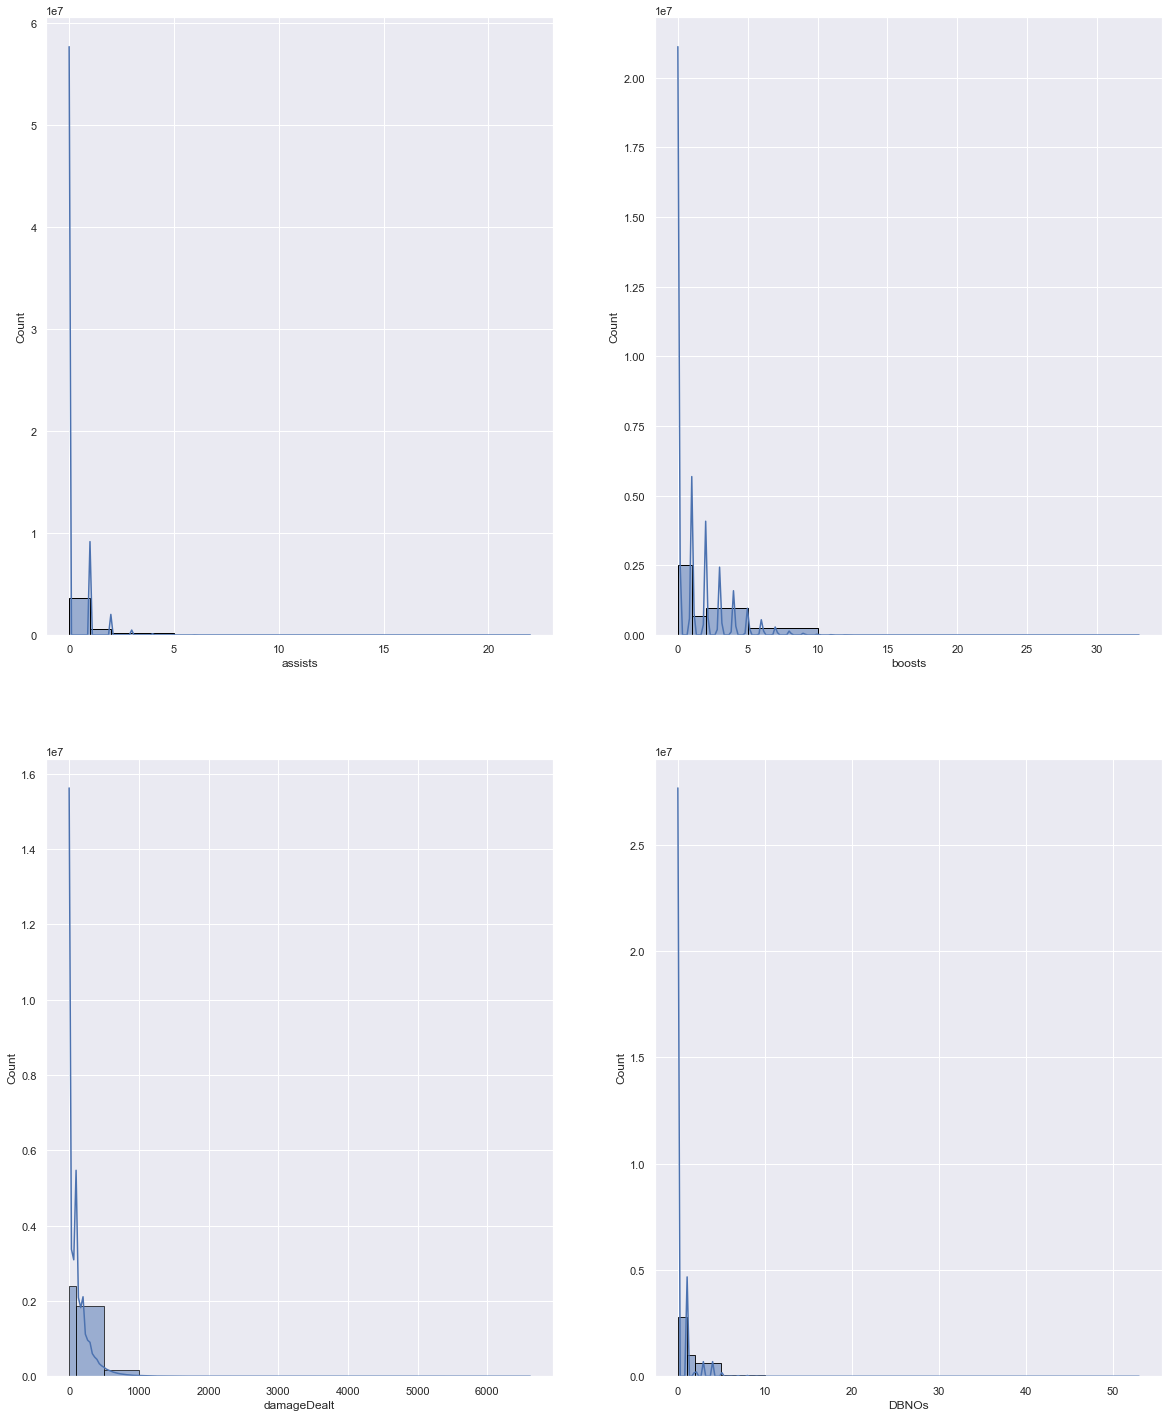

In [7]:
#lets analyse the first 4 columns by ploting histogram
from pylab import *#PyLab is a procedural interface to the Matplotlib object-oriented plotting library
#custom bins are used to analyse better
sns.set(rc={"figure.figsize": (20, 25)});np.random.seed(0)

subplot(2,2,1)
ax = sns.histplot(data["assists"],bins=[0,1,2,5,10,20],kde=True,edgecolor='black')

subplot(2,2,2)
ax = sns.histplot(data["boosts"],bins=[0,1,2,5,10,20],kde=True,edgecolor='black')

subplot(2,2,3)
ax = sns.histplot(data["damageDealt"],bins=[0,100,500,1000,2000,5000],kde=True,edgecolor='black')

subplot(2,2,4)
ax = sns.histplot(data["DBNOs"],bins=[0,1,2,5,10,20],kde=True,edgecolor='black')

plt.show()

**Assist**

In [16]:
print(data.assists.mean())
print(data.assists.median())
print(data.assists.min())
print(data.assists.max())
print((data.assists.value_counts()/4446966*100).head(5))

0.23381492010507837
0.0
0
22
0    82.475557
1    13.309816
2     3.083990
3     0.801445
4     0.224648
Name: assists, dtype: float64


* **Assist** are teamwork which means helping the teammate to kill an enemy 
* This is a discrete data..
 When we look into the plot the data looks skewed towards right(positively skewed) and it has a long tale..
The average number of assist is close to 0..
Around 13% players was given an assist of 1..The maximum number of assist given is 22..

**Boosts**

In [19]:
print(data.boosts.mean())
print(data.boosts.median())
print(data.boosts.min())
print(data.boosts.max())
print((data.boosts.value_counts()/4446966*100).head(5))

1.1069077209045448
0.0
0
33
0    82.475557
1    13.309816
2     3.083990
3     0.801445
4     0.224648
Name: assists, dtype: float64


* This is a positively skewed distribution.**Boosts** are Energy drinks etc used to boost and energise in this game..The average boost supplies was used during the paly is 1 and maximum is 33..
82% of players not used any boosts in this data..

 **DamageDealt**

In [20]:
print(data.damageDealt.mean())
print(data.damageDealt.median())
print(data.damageDealt.min())
print(data.damageDealt.max())
print((data.damageDealt.value_counts()/4446966*100).head(5))

130.63311767578125
84.23999786376953
0.0
6616.0
0.0      27.841499
100.0     5.909220
200.0     1.403159
300.0     0.309582
75.0      0.288399
Name: damageDealt, dtype: float64


* The distribution is not normal.It is skewed towards right,may be this data will include cheaters
* DamageDealt is the amount of damage that a player does to another..The average damage given was 130 . 27% of playes didnot given any damage to enemy palyers(They may died without taking any guns, may be the player was noob or player may be went offline)
* Maxmimum damage was given 6616..

**DBNOs**

In [21]:
print(data.DBNOs.mean())
print(data.DBNOs.median())
print(data.DBNOs.min())
print(data.DBNOs.max())
print((data.DBNOs.value_counts()/4446966*100).head(5))

0.6578755043326169
0.0
0
53
0    62.373650
1    22.111278
2     8.885137
3     3.658269
4     1.558523
Name: DBNOs, dtype: float64


* **DBNOs** are the number of enemies knocked out.Both dead players and undead players will appear on this list.(Either knocked players will die or revived by teammates)..The average players are knocked out was not close to 1..The maximum number is 53..When we look into the plot it is clear that distribution towards zero is high and more than 35% players knocked out thier 
enemies atleast once..

**TeamKills,WinPoints,WalkDistance and WeaponsAcquired**

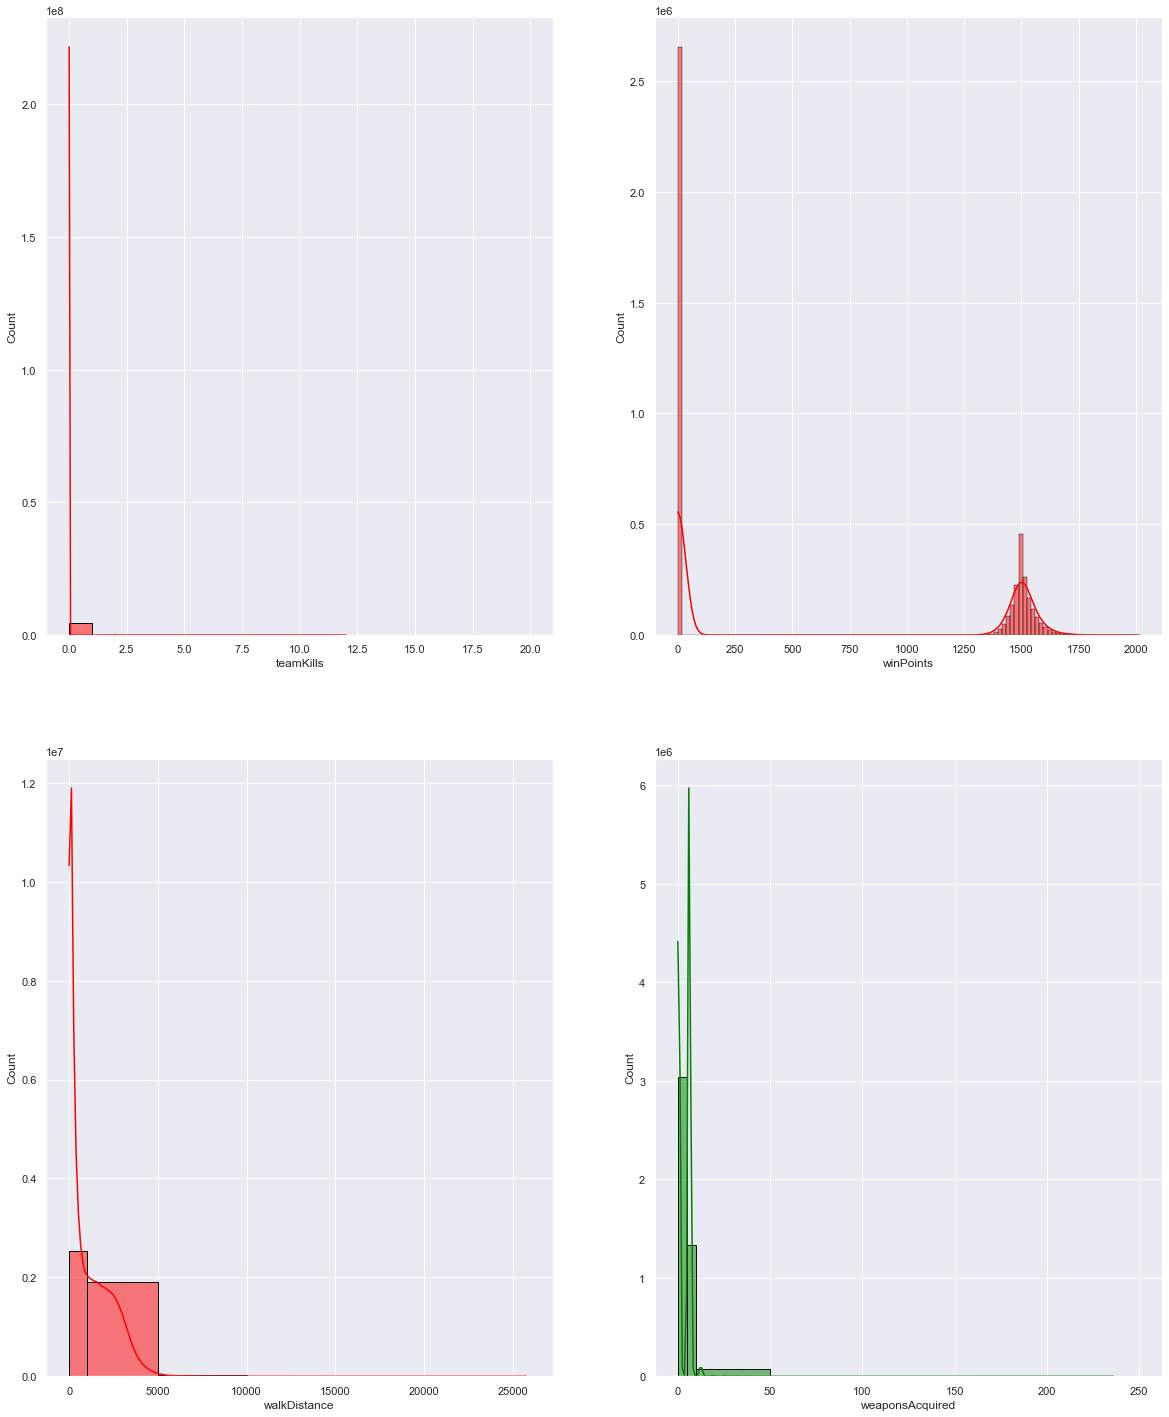

In [8]:
sns.set(rc={"figure.figsize": (20, 25)});np.random.seed(0)

subplot(2,2,1)
ax = sns.histplot(data["teamKills"],bins=[0,1,2,3,10,20],color="red",kde=True,edgecolor='black')

subplot(2,2,2)
ax = sns.histplot(data["winPoints"],color="red",kde=True,edgecolor='black')

subplot(2,2,3)
ax = sns.histplot(data["walkDistance"],bins=[0,1000,5000,10000,26000],color="red",kde=True,edgecolor='black')

subplot(2,2,4)
ax = sns.histplot(data["weaponsAcquired"],bins=[0,5,10,50,100,250],color="green",kde=True,edgecolor='black')

plt.show()

**TeamKills**

In [23]:
print(data.teamKills.mean())
print(data.teamKills.median())
print(data.teamKills.min())
print(data.teamKills.max())
print((data.DBNOs.value_counts()/4446966*100).head(5))

0.0238684082585745
0.0
0
12
0    62.373650
1    22.111278
2     8.885137
3     3.658269
4     1.558523
Name: DBNOs, dtype: float64


* **Teamkills** is the toatl kills of players while playing in a group...This is  a disctrete data...In our data maximum is teamkills was 12..


**WinPoints**

In [24]:
print(data.winPoints.mean())
print(data.winPoints.median())
print(data.winPoints.min())
print(data.winPoints.max())
print((data.winPoints.value_counts()/4446966*100).head(5))

606.4601305699211
0.0
0
2013
0       59.718176
1500     3.455727
1502     0.424087
1501     0.423412
1503     0.421681
Name: winPoints, dtype: float64


* **winPoints** points are ponits that will get after the match or after players death..That will be based on match duration,kills,damage dealt etc.
Average winpoints got was 606 and maximum is 2013..The distribution is not normal ,59% of  players won zero points ..
But when we look up into the graph there is an increase between 1400 and 1600 area...

**WalkDistance**

In [25]:
print(data.walkDistance.mean())
print(data.walkDistance.median())
print(data.walkDistance.min())
print(data.walkDistance.max())
print((data.walkDistance.value_counts()/4446966*100).head(5))

1148.5169677734375
685.5999755859375
0.0
25780.0
0.0       2.239797
1007.0    0.021475
1098.0    0.021250
1047.0    0.021116
1036.0    0.021003
Name: walkDistance, dtype: float64


* **Walk distance** is in meters and it is a continious data which includes players walking,running distance..2% of players had no movment(either offline or died while landing)..The average distance of walking is 1148 meters and maximum distance walked by a player is 25780 meters.
* The distrinution is positively skewed

**Weapons Acquired**

In [27]:
print(data.weaponsAcquired.mean())
print(data.weaponsAcquired.median())
print(data.weaponsAcquired.min())
print(data.weaponsAcquired.max())
print((data.walkDistance.value_counts()/4446966*100).head(5))

3.6604876223474614
3.0
0
236
0.0       2.239797
1007.0    0.021475
1098.0    0.021250
1047.0    0.021116
1036.0    0.021003
Name: walkDistance, dtype: float64


* Most of players acquired 2 to 4 weapons which is necessary for battle immediately after landing...The average number is 3 and median is also the same. The maximum number of weapons acquired is 236 and distribution is also has a long tale ,it indicates the presence of cheating

**RoadKills,Revives,Ride Distance and Siwn Distance**

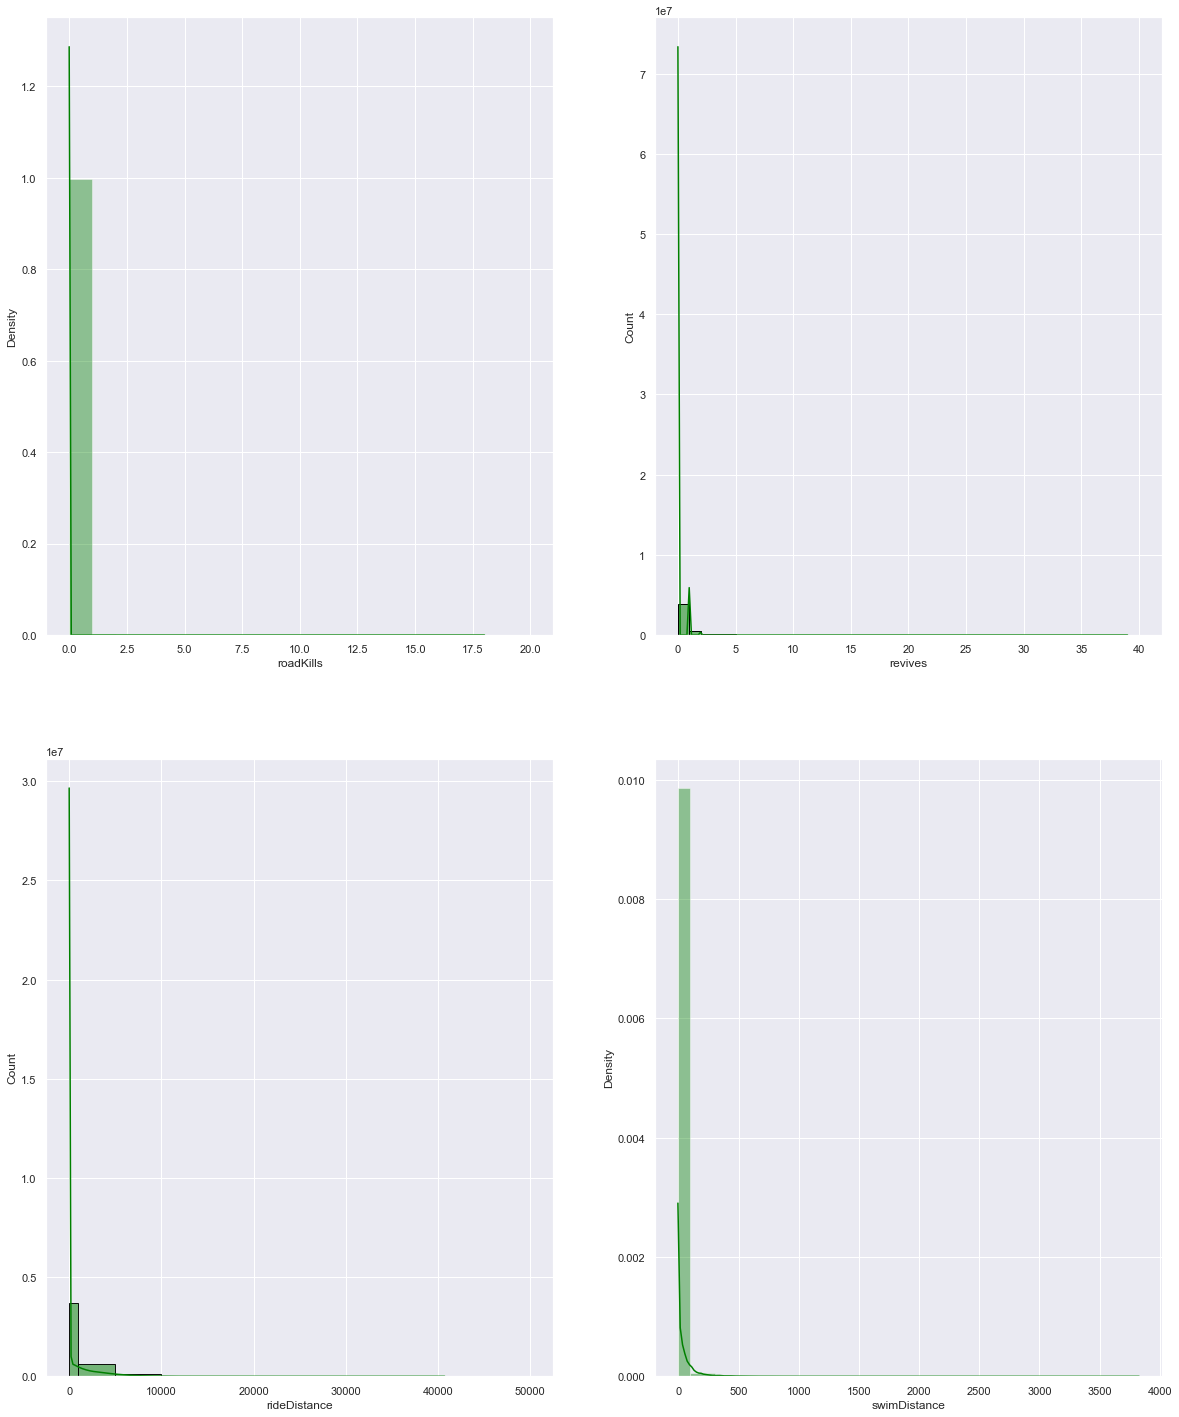

In [9]:
sns.set(rc={"figure.figsize": (20, 25)});np.random.seed(0)

subplot(2,2,1)
ax = sns.distplot(data["roadKills"],bins=[0,1,2,3,5,10,20],color="green")

subplot(2,2,2)
ax = sns.histplot(data["revives"],bins=[0,1,2,5,10,20,40],color="green",kde=True,edgecolor='black')

subplot(2,2,3)
ax = sns.histplot(data["rideDistance"],bins=[0,1000,5000,10000,20000,50000],color="green",kde=True,edgecolor='black')

subplot(2,2,4)
ax = sns.distplot(data["swimDistance"],bins=[0,100,300,500,1000,2000,3000],color="green")


**RoadKills**

In [30]:
print(data.roadKills.mean())
print(data.roadKills.median())
print(data.roadKills.min())
print(data.roadKills.max())
print((data.roadKills.value_counts()/4446966*100).head(5))

0.0034960914924917347
0.0
0
18
0    99.707756
1     0.252914
2     0.029188
3     0.006679
4     0.001619
Name: roadKills, dtype: float64


* Killing enemies using vehicle...99% players didnot have a road kill. The data distribution is not normal...The average road kills and median is  zero..
and maximum is 18 which seems to be abnormal..

**Revives**

In [33]:
print(data.revives.mean())
print(data.revives.median())
print(data.revives.min())
print(data.revives.max())
print((data.revives.value_counts()/4446966*100).head(5))

0.16465900571310868
0.0
0
39
0    86.797763
1    10.571477
2     2.148544
3     0.389771
4     0.069755
Name: revives, dtype: float64


In [ ]:
* When a player gets knocked teammates will revive this knocked player..The distribution is positively skewed ..
 86%  of players didnot revived his teammates(it may include solo matches)...Maximum revived is 39.

**Ride Distance and Swin Distance**

In [35]:
print(data.swimDistance.mean())
print(data.swimDistance.median())
print(data.swimDistance.min())
print(data.swimDistance.max())
print((data.swimDistance.value_counts()/4446966*100).head(5))
print(data.rideDistance.mean())
print(data.rideDistance.median())
print(data.rideDistance.min())
print(data.rideDistance.max())
print((data.rideDistance.value_counts()/4446966*100).head(5))

4.509239673614502
0.0
0.0
3823.0
0.000000      93.495071
102.400002     0.002743
101.400002     0.002339
102.800003     0.002339
114.099998     0.002226
Name: swimDistance, dtype: float64
606.0923461914062
0.0
0.0
40710.0
0.0       74.419930
1010.0     0.007511
1158.0     0.007466
1045.0     0.007443
1318.0     0.007398
Name: rideDistance, dtype: float64


* Both the distributions are not normal
* Distance travelled using a vehicle is ride distance and distance that a players swim is swim distance...The average road distance is 606 meters and and average swim distance is 4.5 meters..
Usually swimming is less required in game ..93% of players didn't swim..Maximum distance swimmimg is 3823 meters..
Around 73 % of players didnt use a vehicle in thier game..Maximum is travelled with a vehicle is 40710 meters..

**KillStreaks,MatchDuration,MaxPlace and NumGroups**

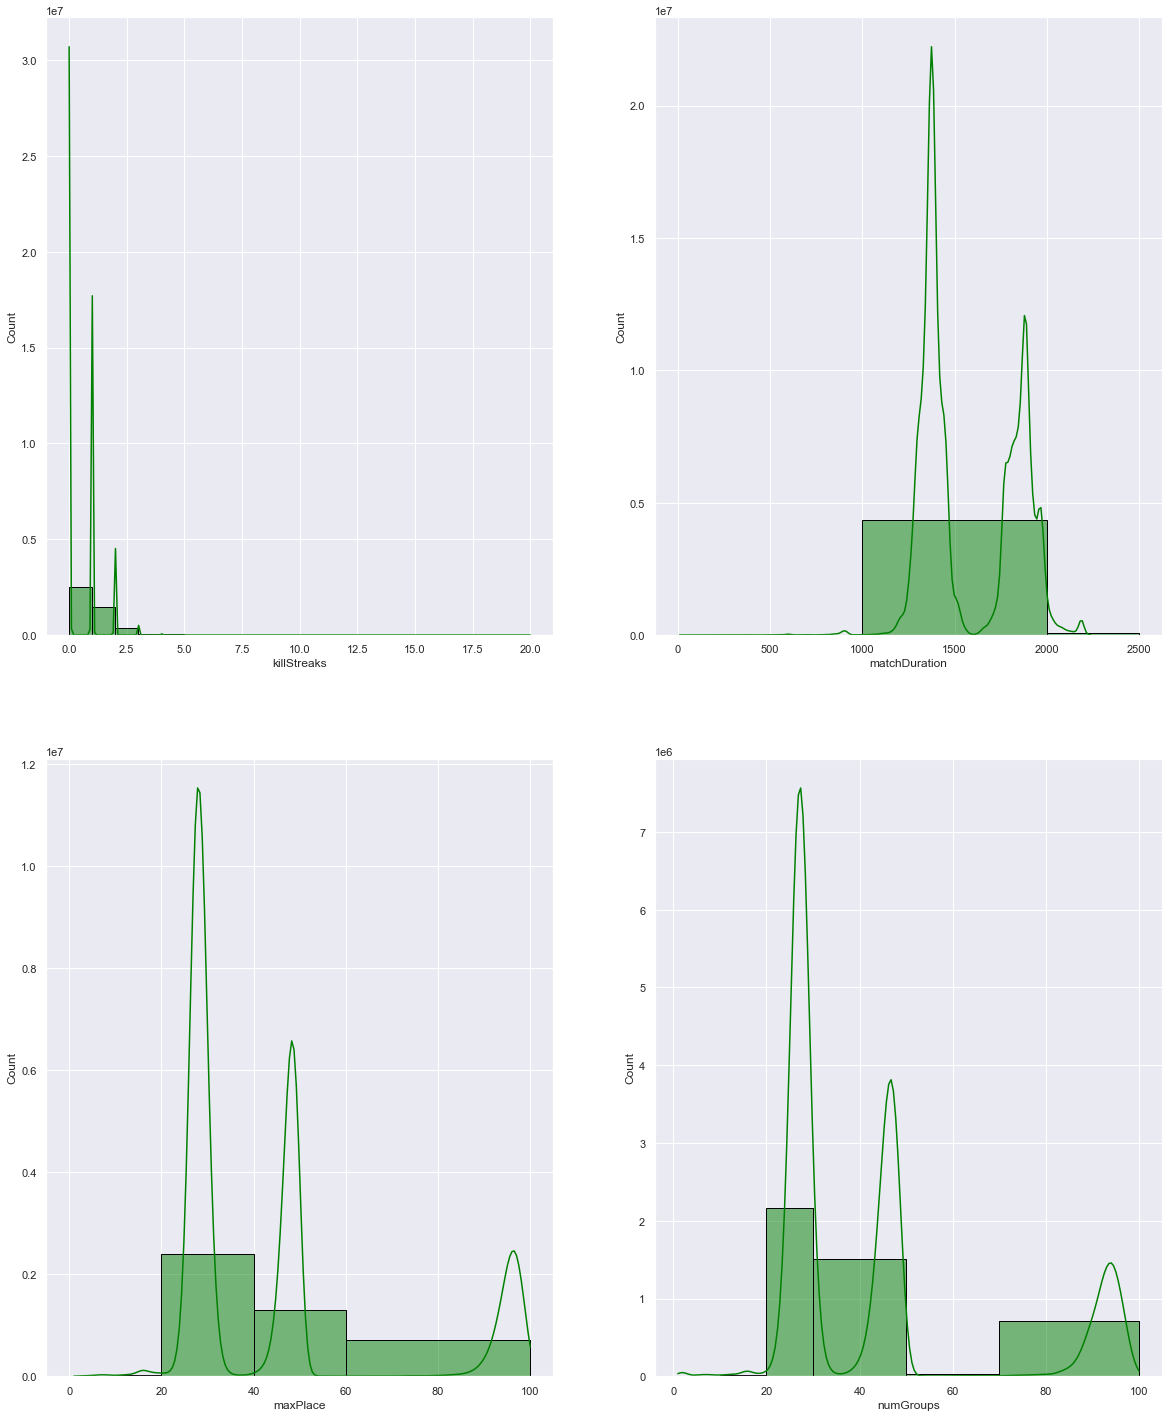

In [10]:
sns.set(rc={"figure.figsize": (20, 25)});np.random.seed(0)

subplot(2,2,1)
ax = sns.histplot(data["killStreaks"],bins=[0,1,2,3,5,10,20],color="green",kde=True,edgecolor='black')

subplot(2,2,2)
ax = sns.histplot(data["matchDuration"],bins=[0,100,600,1000,2000,2500],color="green",kde=True,edgecolor='black')

subplot(2,2,3)
ax = sns.histplot(data["maxPlace"],bins=[0,10,20,40,60,100],color="green",kde=True,edgecolor='black')

subplot(2,2,4)
ax = sns.histplot(data["numGroups"],bins=[10,20,30,50,70,100],color="green",kde=True,edgecolor='black')

plt.show()

**Killstreak**

In [38]:
print(data.killStreaks.mean())
print(data.killStreaks.median())
print(data.killStreaks.min())
print(data.killStreaks.max())
print((data.killStreaks.value_counts()/4446966*100).head(5))

0.543955137052993
0.0
0
20
0    56.886470
1    33.181230
2     8.755318
3     1.033469
4     0.128425
Name: killStreaks, dtype: float64


* Kills streaks are series of kills in a row without dying..Most of the players didnt have a kill streak..When we look in to the
graph indicates kills streak is high in 0,1 and 2 area..The average kill streak is not even closer to one..The maximum kills streak is 20 and it seems to be abnormal

**Match Duration of players**


In [39]:
print(data.matchDuration.mean())
print(data.matchDuration.median())
print(data.matchDuration.min())
print(data.matchDuration.max())
print((data.matchDuration.value_counts()/4446966*100).head(5))

1579.5064396714524
1438.0
9
2237
1384    0.624336
1374    0.612980
1376    0.601646
1380    0.601039
1381    0.590537
Name: matchDuration, dtype: float64


* The average match duration is 1579 seconds and median 1438..when we look into the graph the distribution
 is high between 1000 and 2000 seconds..The maximum match duration was recorded 2237 seconds..

**Number of Groups in a Game**

In [41]:
print(data.numGroups.mean())
print(data.numGroups.median())
print(data.numGroups.min())
print(data.numGroups.max())
print((data.numGroups.value_counts()/4446966*100).head(5))

43.00759259234273
30.0
1
100
27    12.089299
28    10.988818
26     9.371423
29     7.075948
47     6.060379
Name: numGroups, dtype: float64


* The number of groups will include solo,duo and squad players..The average number of groups in a match is 43 and maximum is 100(which is solo match)
when we look into the graphs we can see there is high in 20 to 40 area..

**MaxPlace**

print(data.maxPlace.mean())
print(data.maxPlace.median())
print(data.maxPlace.min())
print(data.maxPlace.max())
print((data.maxPlace.value_counts()/4446966*100).head(5))

* There is 100 players in a game and on an average 43 groups is there in a match..
The averge of max place is 44..Data distribution between 20 to 50 is high..

**Kills,Killpoints,Headshotkills and Heals**

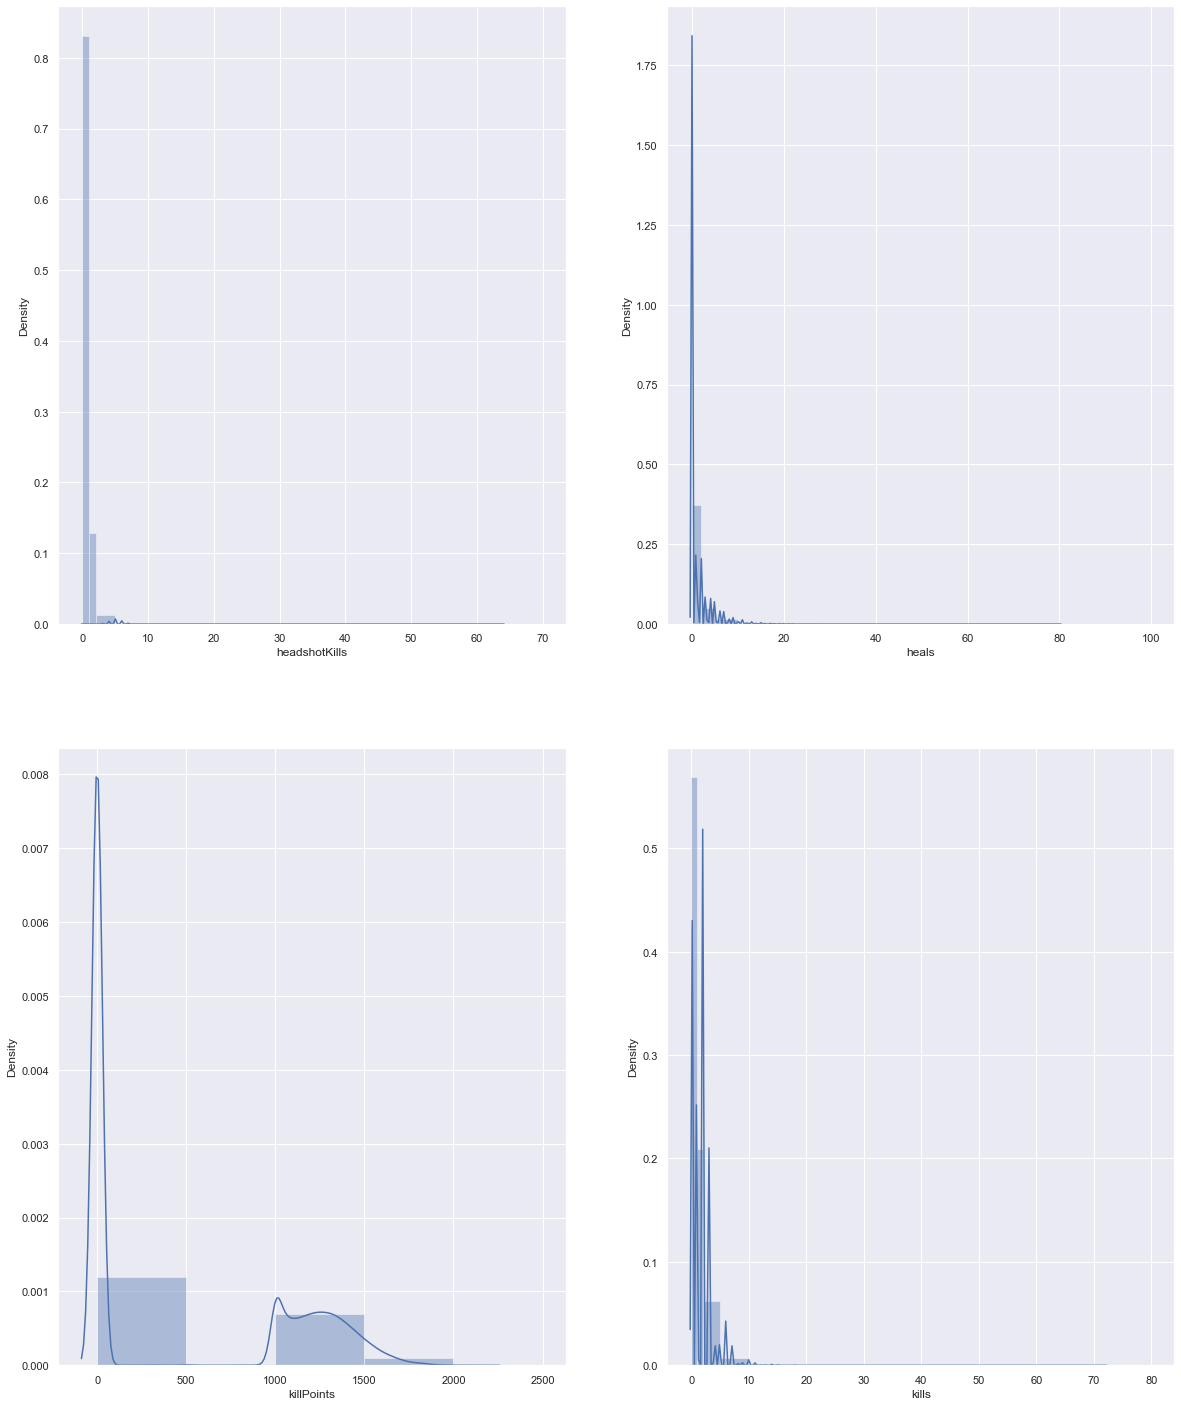

In [11]:
sns.set(rc={"figure.figsize": (20, 25)});np.random.seed(0)

subplot(2,2,1)
ax = sns.distplot(data["headshotKills"],bins=[0,1,2,5,10,70],kde_kws=dict(cut=5))

subplot(2,2,2)
ax = sns.distplot(data["heals"],bins=[0,2,5,10,20,100])

subplot(2,2,3)
ax = sns.distplot(data["killPoints"],bins=[0,500,1000,1500,2000,2500])

subplot(2,2,4)
ax = sns.distplot(data["kills"],bins=[0,1,2,5,10,20,80])

plt.show()

In [44]:
print("details of headshotkills")
print(data.headshotKills.mean())
print(data.headshotKills.median())
print(data.headshotKills.min())
print(data.headshotKills.max())
print((data.headshotKills.value_counts()/4446966*100).head(5))
print("details of kills")
print(data.kills.mean())
print(data.kills.median())
print(data.kills.min())
print(data.kills.max())
print((data.kills.value_counts()/4446966*100).head(5))
print("details of killpoints")
print(data.killPoints.mean())
print(data.killPoints.median())
print(data.killPoints.min())
print(data.killPoints.max())
print((data.killPoints.value_counts()/4446966*100).head(5))

details of headshotkills
0.22681958890623405
0.0
0
64
0    83.115454
1    12.924340
2     2.841218
3     0.741517
4     0.224018
Name: headshotKills, dtype: float64
details of kills
0.9247833241810259
0.0
0
72
0    56.886470
1    20.869937
2    10.624457
3     5.226957
4     2.800629
Name: kills, dtype: float64
details of killpoints
505.00604209701623
0.0
0
2170
0       59.718176
1000     3.096021
1256     0.077199
1233     0.074972
1268     0.074658
Name: killPoints, dtype: float64


* The average kills of a player is closer to 1 and the maximum kill was 72 which is abnormal..Distribution between 0 to 10 kills is high ..
The average kill point is 505..More than 50% of players didnot have a kill and killpoints..The maximum kill points was recorded 2170..
This kills will include headshot kills ,59% of players didnt got a headshot kill and the average was closer to zero..The maximum headshot kill that a player got is 64 which indicates the presence of cheating

**Heals**

In [45]:
print(data.heals.mean())
print(data.heals.median())
print(data.heals.min())
print(data.heals.max())
print((data.heals.value_counts()/4446966*100).head(5))

1.370147196987789
0.0
0
80
0    59.550669
1    15.135645
2     7.182133
3     4.550743
4     3.207513
Name: heals, dtype: float64


* Healings are supplies(bandages,painkillers) used for faster recovery from injury.
59% of players didnt used any healings in game.The average healings are used 1 and maximum is 80..

**Match Type**

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(data['matchType'], order=data["matchType"].value_counts().index)
plt.ticklabel_format(style="plain", axis='y')
plt.show()

* Players are more interested in squad games and after that duos and solos..flare tpp,flare fpp,crash tpp and crash tpp are event modes and data under this category is less

### Bivariate Analysis And Multivaraite Analysis

**Kills and Winpercenatge**

In [12]:
avg_V = data.groupby(by = ['kills'])['winPlacePerc'].mean().reset_index()
import plotly.express as px
df=avg_V
fig = px.bar(df, x="kills", y="winPlacePerc",
             barmode='overlay')
fig.show()

print("corelation between winpercentage and number of kills is",data["kills"].corr(data["winPlacePerc"])) 

corelation between winpercentage and number of kills is 0.41991598716812417


* In order to win the game we need to defeat more enemies
* Kills has positive correlation to win percentage and it is an important factor in game(killplace,killpoints,winpoints,rankpoints,Winpercentage are depends on kills)


**kills points and win percentage**

In [13]:
dama=data.copy()

Text(0.5, 1.0, '*kills points and win percentage')

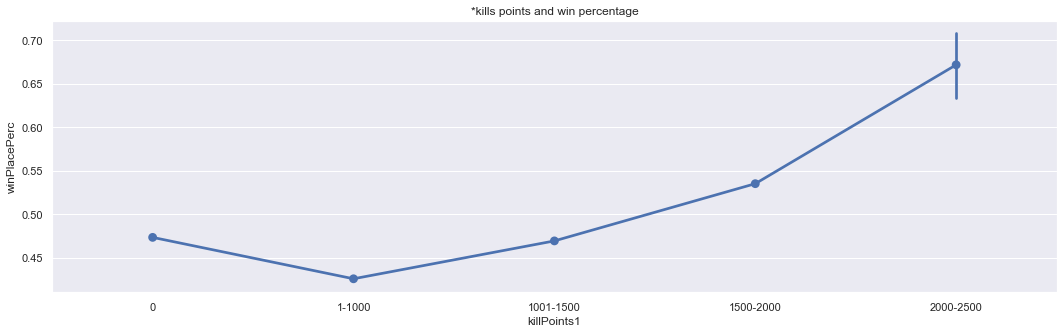

In [14]:

#dividing the kills points column values into 5 bins for easy visualise
dama['killPoints1']= pd.cut(dama['killPoints'],[-1,
                                                0,1000,1500,2000,2500],labels=['0','1-1000','1001-1500','1500-2000','2000-2500'])
plt.figure(figsize=(18,5))
sns.pointplot(data=dama, y="winPlacePerc", x="killPoints1")#plotting using point plot
plt.title('*kills points and win percentage')

* There is a positive relationship between killpoints and Winpercentage..As one increases the other increases as well..
(kill points are depends on kills and DBNO's)

**Win points and Win percenatge**

<AxesSubplot:xlabel='winPlacePerc', ylabel='winPoints'>

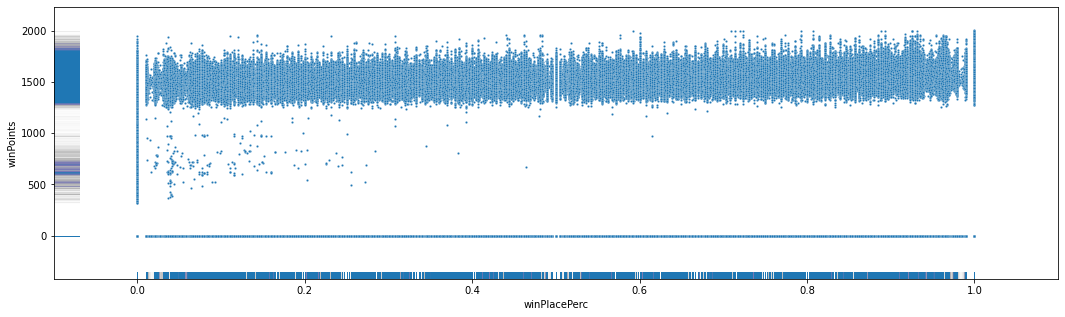

In [6]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=data, x="winPlacePerc",y="winPoints", s=5)
sns.rugplot(data=data, x="winPlacePerc", y="winPoints", lw=1, alpha=.005)

In [8]:
data["winPlacePerc"].corr(data["winPoints"])

0.007060828192536333

* Win points are mainly depends on survival time,kills,supplies used etc.. It has a moderate relationship towards the win percentage

**walkDistance and win percentage**

<Figure size 1296x360 with 0 Axes>

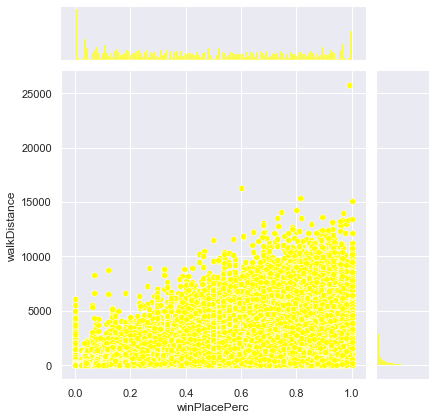

In [16]:
plt.figure(figsize=(18,5))
sns.jointplot(data=data, y="walkDistance", x="winPlacePerc",color="yellow")
plt.show()

In [10]:
data["walkDistance"].corr(data["winPlacePerc"])

0.8108875246572549

* Walk distance is highly positively correlated with Winpercentage ..Players are hurry and walk more based on the zone change(circle region will reduced to small and small in this match)..

**Boost,Heals And Win percentage**

In [17]:
dama['heals']= pd.cut(dama['heals'],[-1,0,1,2,5,10,20,80],labels=['0','1','2','3-5','5-10','11-20','21-80'])
dama['boosts']= pd.cut(dama['boosts'],[-1,0,1,2,5,10,20,80],labels=['0','1','2','3-5','5-10','11-20','21-80'])
avg_boost=dama.groupby(by=["boosts"])["winPlacePerc"].mean().reset_index()
avg_heals=dama.groupby(by=["heals"])["winPlacePerc"].mean().reset_index()

Text(0.5, 1.0, 'Boost,Heals And Win percentage')

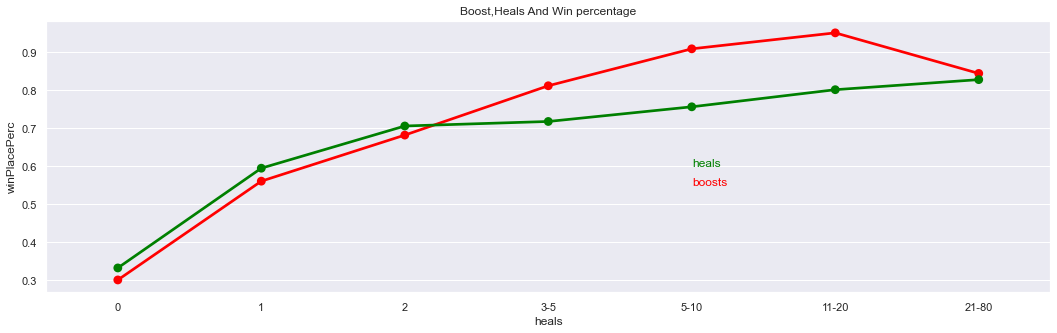

In [18]:
plt.figure(figsize=(18,5))
sns.pointplot(data=avg_boost, y="winPlacePerc", x="boosts",color='red',alpha=0.8)
sns.pointplot(data=avg_heals, y="winPlacePerc", x="heals",color='green',alpha=0.8)
plt.text(4,0.6,'heals',color='green')
plt.text(4,0.55,'boosts',color='red')

plt.title('Boost,Heals And Win percentage')

* Boost are more important supplies that it helps the players to walk,run and heal faster which is needed thrughout the game,Heal supplies are also necessary not that much important as boost items.
* Boost and heal items are inevitable to win a game


**WalkDistance,Heals and WinPlacePerc**

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data,x="walkDistance",y="boosts",hue="winPlacePerc")

* when a player use more boost supplies, he can walk and run faster towards the zone and his win probability is high

**swimDistance and winPlacePerc**

<AxesSubplot:xlabel='winPlacePerc', ylabel='swimDistance'>

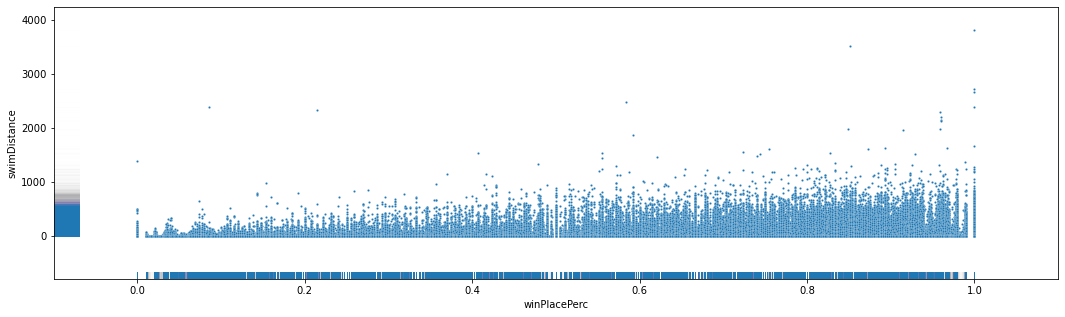

In [7]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=data, x="winPlacePerc",y="swimDistance", s=5)
sns.rugplot(data=data, x="winPlacePerc", y="swimDistance", lw=1, alpha=.005)

In [14]:
data["swimDistance"].corr(data["winPlacePerc"])

0.14960737382512995

* Correlation between swim distance and win percentage is relatively small..In pubg game map is surrounded by water and there is many rivers in it..
players sometime need to swim to get into zone,so swimming has a small impact on win percentage

**DBNOs,Revives and Win Percentage**

In [20]:
dama['DBNOs']= pd.cut(dama['DBNOs'],[-1,0,1,2,3,4,5,10,20,60],labels=['0','1','2','3','4','5','6-10','11-20','21-60'])
dama['revives']= pd.cut(dama['revives'],[-1,0,1,2,5,10,20,40],labels=['0','1','2','3-5','6-10','11-20','21-40'])
avg_DBNOs=dama.groupby(by=["DBNOs"])["winPlacePerc"].mean().reset_index()
avg_revives=dama.groupby(by=["revives"])["winPlacePerc"].mean().reset_index()

Text(0.5, 1.0, 'DBNOs,revives And Win percentage')

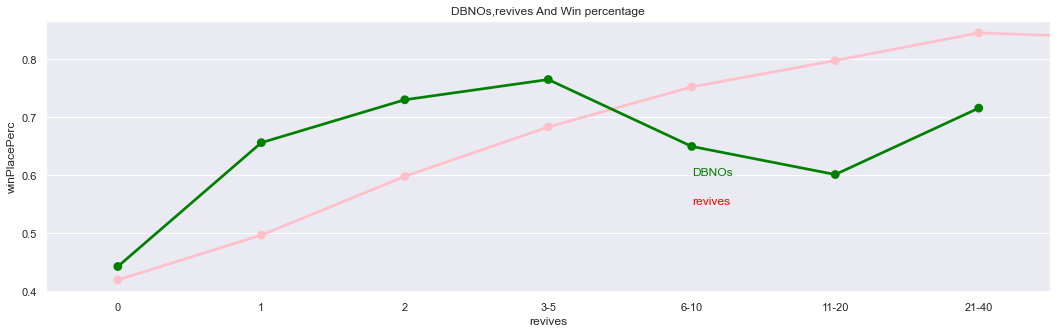

In [21]:
plt.figure(figsize=(18,5))
sns.pointplot(data=avg_DBNOs, y="winPlacePerc", x="DBNOs",color='pink',alpha=0.8)
sns.pointplot(data=avg_revives, y="winPlacePerc", x="revives",color='green',alpha=0.8)
plt.text(4,0.6,'DBNOs',color='green')
plt.text(4,0.55,'revives',color='red')

plt.title('DBNOs,revives And Win percentage')

* Here we can see there is direct relationship between revives and winpercentage..
..Sometimes we will knocked down our enemy players(DBNO's)
Reviving is saving our teammates from death..
If we revive our teammates while battle team strength will increase and thus win percentage also will increase
* But DBNO's number of enemies knocked didnot have much impact on winpercentage(because kill is important).If we knocked down our enemies, sometimes their teammates will revive him.But his health will reduce gradually...

**DBNO's and Damagedealt**

<AxesSubplot:xlabel='DBNOs', ylabel='damageDealt'>

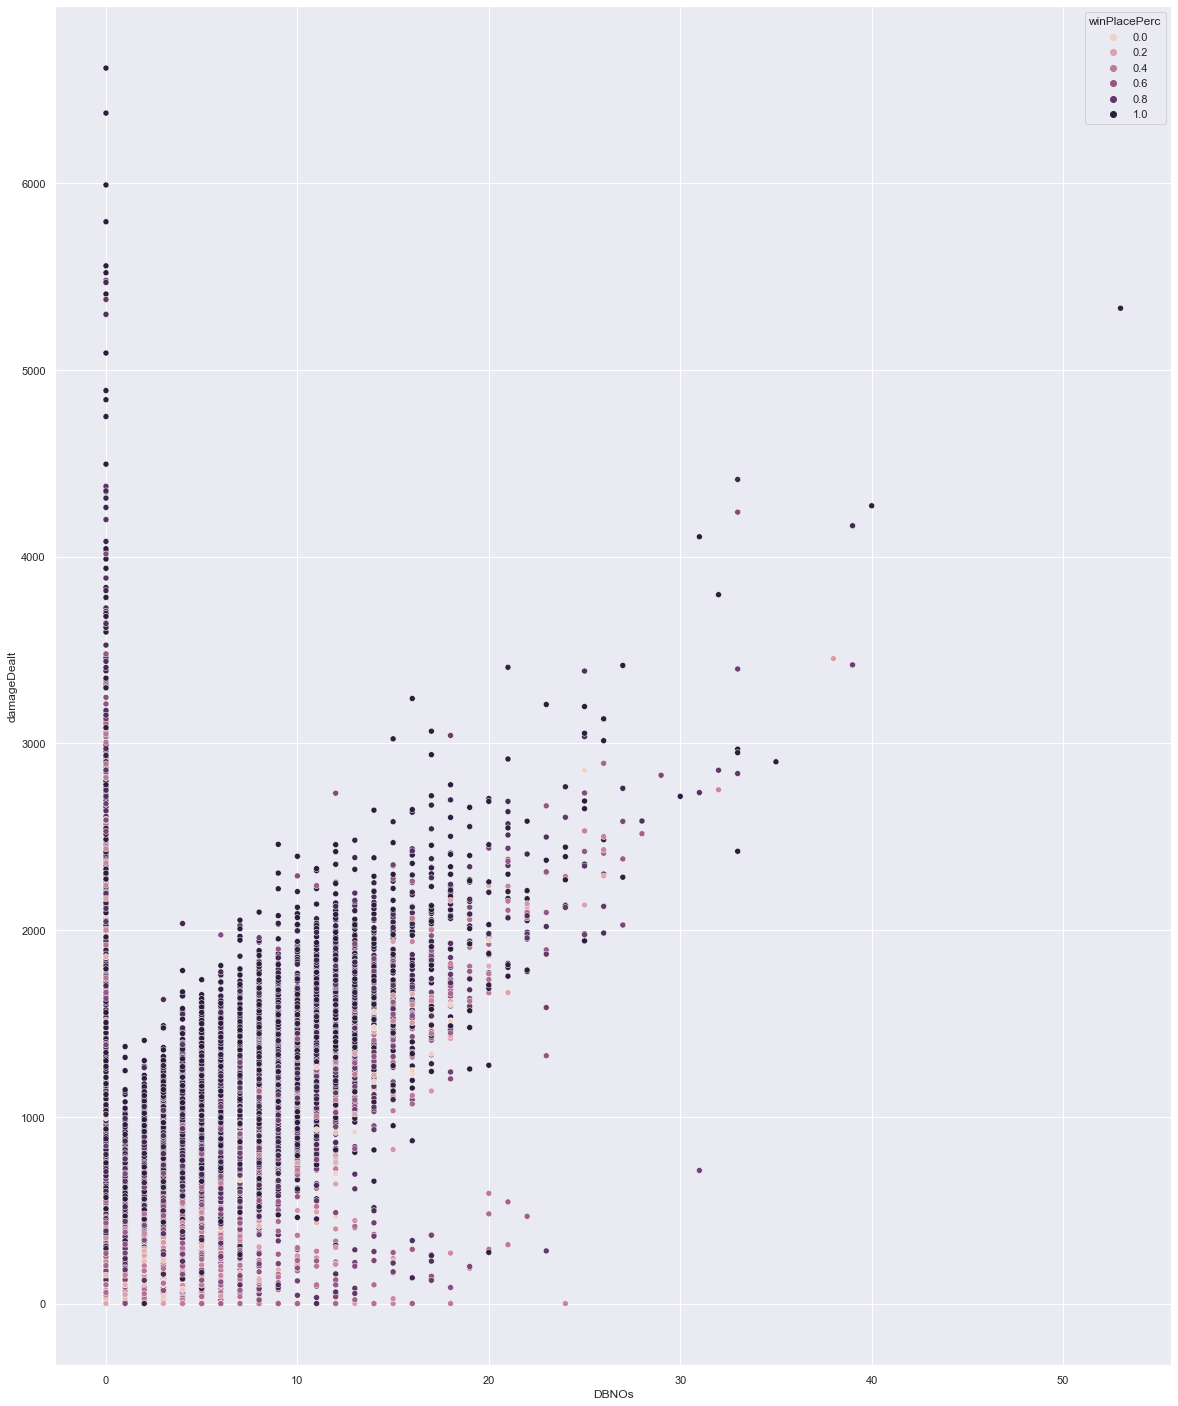

In [22]:
plt.figure(figsize=(18,5))
sns.scatterplot(x=data["DBNOs"],y=data['damageDealt'],hue=data["winPlacePerc"])

* DBNOs & damage Dealt is linearly correlated with winning place probability

**Road kills and  Win percentage**

correlation betweeen road kills and win percentage 0.03454376829502071


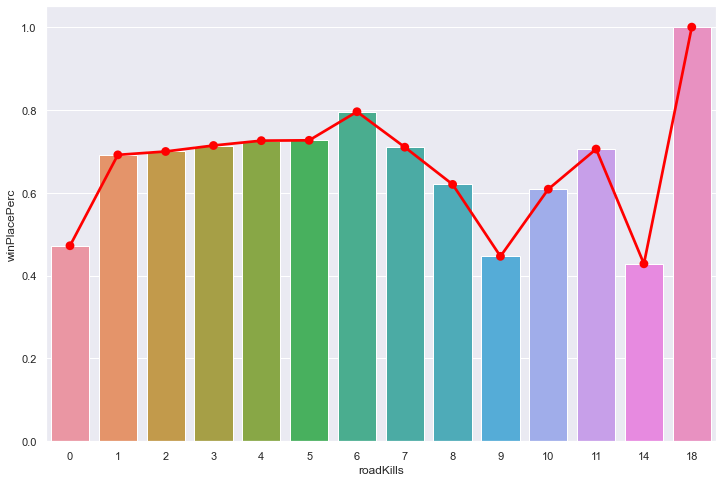

In [23]:

avg_rd = data.groupby(by = ['roadKills'])['winPlacePerc'].mean().reset_index()
print("correlation betweeen road kills and win percentage",data["roadKills"].corr(data["winPlacePerc"]))
plt.figure(figsize=(12,8))
sns.barplot(x='roadKills',y="winPlacePerc",data=avg_rd)
sns.pointplot(data=avg_rd, y="winPlacePerc", x="roadKills",color='red',alpha=0.8)
plt.show()

* As we can see that corelation between roadkills and winpercentage close to zero, it has no relationship 
with win percentage..it occurs when a palyer has good driving skills,sometimes players got the kills accidently..It has not that much
impact on win percentage

**Damage dealt and Win percenatge**

correlation betweeen damageDealt and win percentage 0.44050679760978356


<AxesSubplot:xlabel='winPlacePerc', ylabel='damageDealt'>

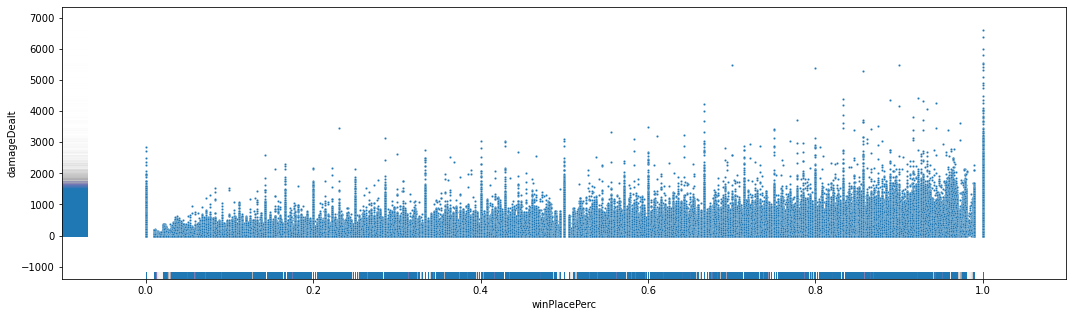

In [8]:
plt.figure(figsize=(18,5))
print("correlation betweeen damageDealt and win percentage",data["winPlacePerc"].corr(data["damageDealt"]))
sns.scatterplot(data=data, x="winPlacePerc",y="damageDealt", s=5)
sns.rugplot(data=data, x="winPlacePerc", y="damageDealt", lw=1, alpha=.005)

* DamageDealt and win percentage are moderately correlated..But  when we look into the graph dispersion data has slight increase towards the win percenatge.The reason is, In duo and squad everyone in the team doesn't necessarily have damage dealt ..Damage dealt is the aggregate of DBNO's and Kills

**Headshot Kills And Win Percenatage**

In [25]:
avg_hd = data.groupby(by = ['headshotKills'])['winPlacePerc'].mean().reset_index()
print("correlation betweeen headshot kills and win percentage",data["headshotKills"].corr(data["winPlacePerc"]))
plt.figure(figsize=(12,8))
import plotly.express as px
df=avg_hd
fig = px.bar(df, x="headshotKills", y="winPlacePerc",
             barmode='overlay')
fig.show()

print("corelation between winpercentage and number of kills is",data["headshotKills"].corr(data["winPlacePerc"]))

correlation betweeen headshot kills and win percentage 0.27772246279948676


corelation between winpercentage and number of kills is 0.27772246279948676


<Figure size 864x576 with 0 Axes>

* We can see a positive correlation between headshot kills and winpercentage..It is not that easy to get headshot kills,the players with 
more than 2 headshot kill has good skill and experience in game..In a normal gameplay,it is rare to headshotkills of more than 8..
But when look into the graph there are many players with headshot kills more than 8..We need to check that players data into detail to search the presence of cheating

**Match duration and Win percentage**

corelation between winpercentage and matchDuration is -0.005171314347228271


<AxesSubplot:xlabel='winPlacePerc', ylabel='matchDuration'>

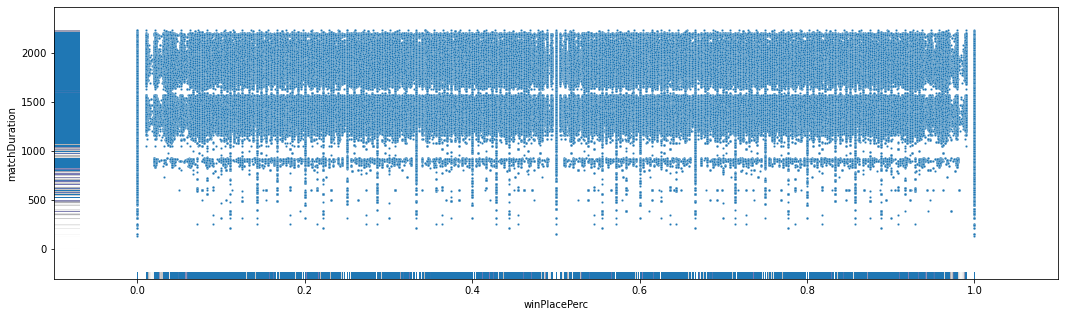

In [9]:
plt.figure(figsize=(18,5))
print("corelation between winpercentage and matchDuration is",data["matchDuration"].corr(data["winPlacePerc"]))
sns.scatterplot(data=data, x="winPlacePerc",y="matchDuration", s=5)
sns.rugplot(data=data, x="winPlacePerc", y="matchDuration", lw=1, alpha=.005)

* The correlation between match duration and winplaceperc is close to zero...For rank points most of the players will survive even in the last circle 

**longestKill and Win Percentage**

corelation between winpercentage and matchDuration is 0.41015355969845696


<AxesSubplot:xlabel='winPlacePerc', ylabel='longestKill'>

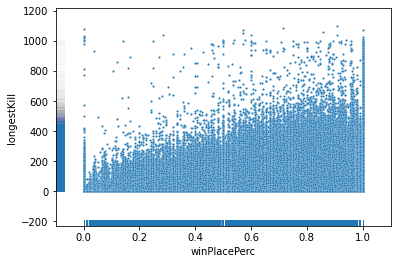

In [5]:

print("corelation between winpercentage and matchDuration is",data["winPlacePerc"].corr(data["longestKill"]))
sns.scatterplot(data=data, x="winPlacePerc",y="longestKill", s=5)
sns.rugplot(data=data, x="winPlacePerc", y="longestKill", lw=1, alpha=.005)

* Longest kills are usualy sniper gun kills and it need a good skill and experience..If player get a skill with that much experience and skill his win percenatge is high..A player can get longest kill for above 900 metres are rare in games but in our data there more than 149 players have kills from more than 900 metres.

**weapons acquired vs Win percentage**

In [ ]:
dama['weaponsAcquired']= pd.cut(dama['weaponsAcquired'],[-1,0,1,2,3,4,5,6,7,10,20,60,250],labels=['0','1','2','3','4','5','6',
                                                                                                  '7','8-10',
                                                                                                  
                                                                                                  '11-20','21-60','60-250'])

In [ ]:
avg_wp= dama.groupby(by = ['weaponsAcquired'])['winPlacePerc'].mean().reset_index()
print("correlation betweeen headshot kills and win percentage",data["weaponsAcquired"].corr(data["winPlacePerc"]))
plt.figure(figsize=(12,8))
import plotly.express as px
df=avg_wp
fig = px.bar(df, x="weaponsAcquired", y="winPlacePerc",
             barmode='overlay')
fig.show()


* There is positive correlation between weapons acquired and win percenatge..When a player get powerfull weapon(especially from Air drop)
he can easily defeats his enemy..In game there are many weapons it has many features, a good player will use this weapons according to the situations..But there are players used for than 30 weapons in a game which is abnormal and it indicates the presence of hacking

**Number of groups and Winpercentage**

<AxesSubplot:xlabel='numGroups', ylabel='matchDuration'>

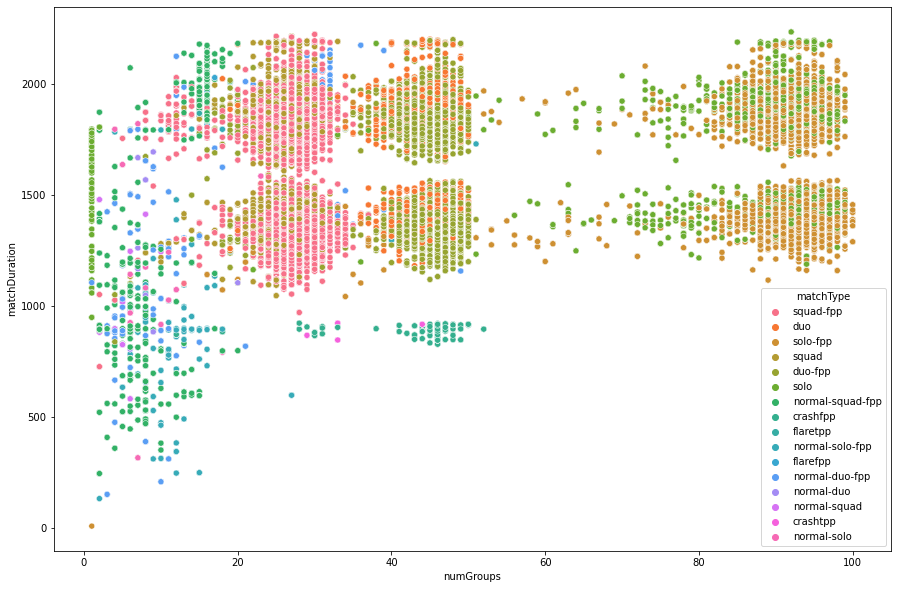

In [6]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=data,x="numGroups",y="matchDuration",hue="matchType")

* Most of play Match Duration is Greater than 1000
* In the dataset Match Type 12 is a most playable match
* 20-30 group played normal-solo match Or crashtpp match
* 40-50 & 80 up group played duo,squad-fpp or normal-squad-fpp matchs

**vehicleDestroys and win percentage**

In [ ]:
data["vehicleDestroys"].corr(data["winPlacePerc"])
avg_vd= dama.groupby(by = ['vehicleDestroys'])['winPlacePerc'].mean().reset_index()
import plotly.express as px
df=avg_vd
fig = px.bar(df, x="vehicleDestroys", y="winPlacePerc",
             barmode='overlay')
fig.show()


In [11]:
data["winPlacePerc"].corr(data["vehicleDestroys"])

0.0734361418782753

* This feature is actually irrelevent because anyone can destroy a vehicle..In game this has not that much importance


**Teamkills and Winpercentage**

In [ ]:
print("correlation",data["teamKills"].corr(data["winPlacePerc"]))
avg_tk= dama.groupby(by = ['teamKills'])['winPlacePerc'].mean().reset_index()
import plotly.express as px
df=avg_tk
fig = px.bar(df, x="teamKills", y="winPlacePerc",
             barmode='overlay')
fig.show()

* Also teamkills and winpercentage shows zero correlation,but in game if team kills is increase winning percentage will also increase..In our
data it shows zero correlation..Team kills are gradually less in our data..But maximum teamkills in our data is 12..

**Match Type and Kills**

In [ ]:
total_kills= data.groupby(by = ['matchType'])['kills'].sum().reset_index()

In [ ]:
df=total_kills
fig = px.bar(df, x="matchType", y="kills",
             barmode='overlay')
fig.show()

* Kills are high in squad mode and then duo mode..Data regarding other match types are limited and kill percentage is less

**Match Type and Win Percentage**

In [ ]:
avg_mt= data.groupby(by = ['matchType'])['winPlacePerc'].sum().reset_index()
df=avg_mt
fig = px.bar(df, x="matchType", y="winPlacePerc",
             barmode='overlay')
fig.show()

* Win percentage is also high in squad game mode and then duo..Data distribution in event mode(others) is less..

### EDA CONCLUSIONS

* Most of the data distributions are **positively skewed distributions**
* **Kills** are the most driving factor towards the win but more than 50% of players didnot have a kill and killpoints
* People mostly prefer **squad** matches over duo's and solo's
* The winning percentage is high when RP is high(experienced players have higher RP)
*  **Match Duration** of most the play is Greater than 1000 seconds
* Most of players acquired **2 to 4 weapons** which is necessary for survival immediately after landing.
A powerfull weapon(especially from Air drop) can easily defeats an enemy,if a player finds good weapon he can kill the enemy easily
* Team work and team coordination is necessary to win a game but **75% of players didnot give any assist or revive** to his team mates
* **Damage dealt** is the aggregate of kills and DBNO's ,**20% of players died or went offline** without taking any guns
* **Win points** are based on kills,survival time,heals and boost etc 50% of players didnot won any points
* Players **walks an average 1100 meters and  Ride 600 meters** in a game, usually swimming is less required in this game 
* More than 90% people didnot got any roadkills
* Rank points are important in a match..players with highest RP are more experienced and  thier win percentage is  also high
* Between **90 - 100 players are joined** in each match
* Number of **kills are high in squad mode** and kills are less in event modes(others)
* **40% of players got atleast one kill streak**.kills streak is high in 0,1 and 2 area
* The **longest match duration**  recorded was **2237** seconds..
* Headshot gives maximum damage and kill enemies easily but **83% players didnot have any headshots**
* **Longest kill distance**  recorded in this game is **1094 meters**
* The data include stats of robot players,cheaters and hackers

## Data preprocessing/Feature Engineering

In [5]:
data.isnull().sum()
#checking for null values

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [6]:
#There is one null value in target column lets drop that row
data.dropna(inplace=True)

In [7]:
#lets rename the columns
data.rename(columns = {'groupId':'gpid','matchId':'mhid','assists':'ast','boosts':'bst','damageDealt':'dmg',
                      'headshotKills':"hdkls","heals":'hls','killPlace':'klpl','killPoints':'kP',
                      'killStreaks':'ktrk','longestKill':'lngkl','matchDuration':'dura',
                      'matchType':'type','maxPlace':'maxp','numGroups':'NoG','rankPoints':'RP',
                      'revives':'REV','rideDistance':'RIDd','roadKills':'rdkls','swimDistance':'swind',
                      'teamKills':'tmkls','vehicleDestroys':'vehcl_destr','walkDistance':'walk_d',
                      'weaponsAcquired':'weapn','winPoints':'WP','winPlacePerc':'WinPerc'}, inplace = True)

**checking for outliers**

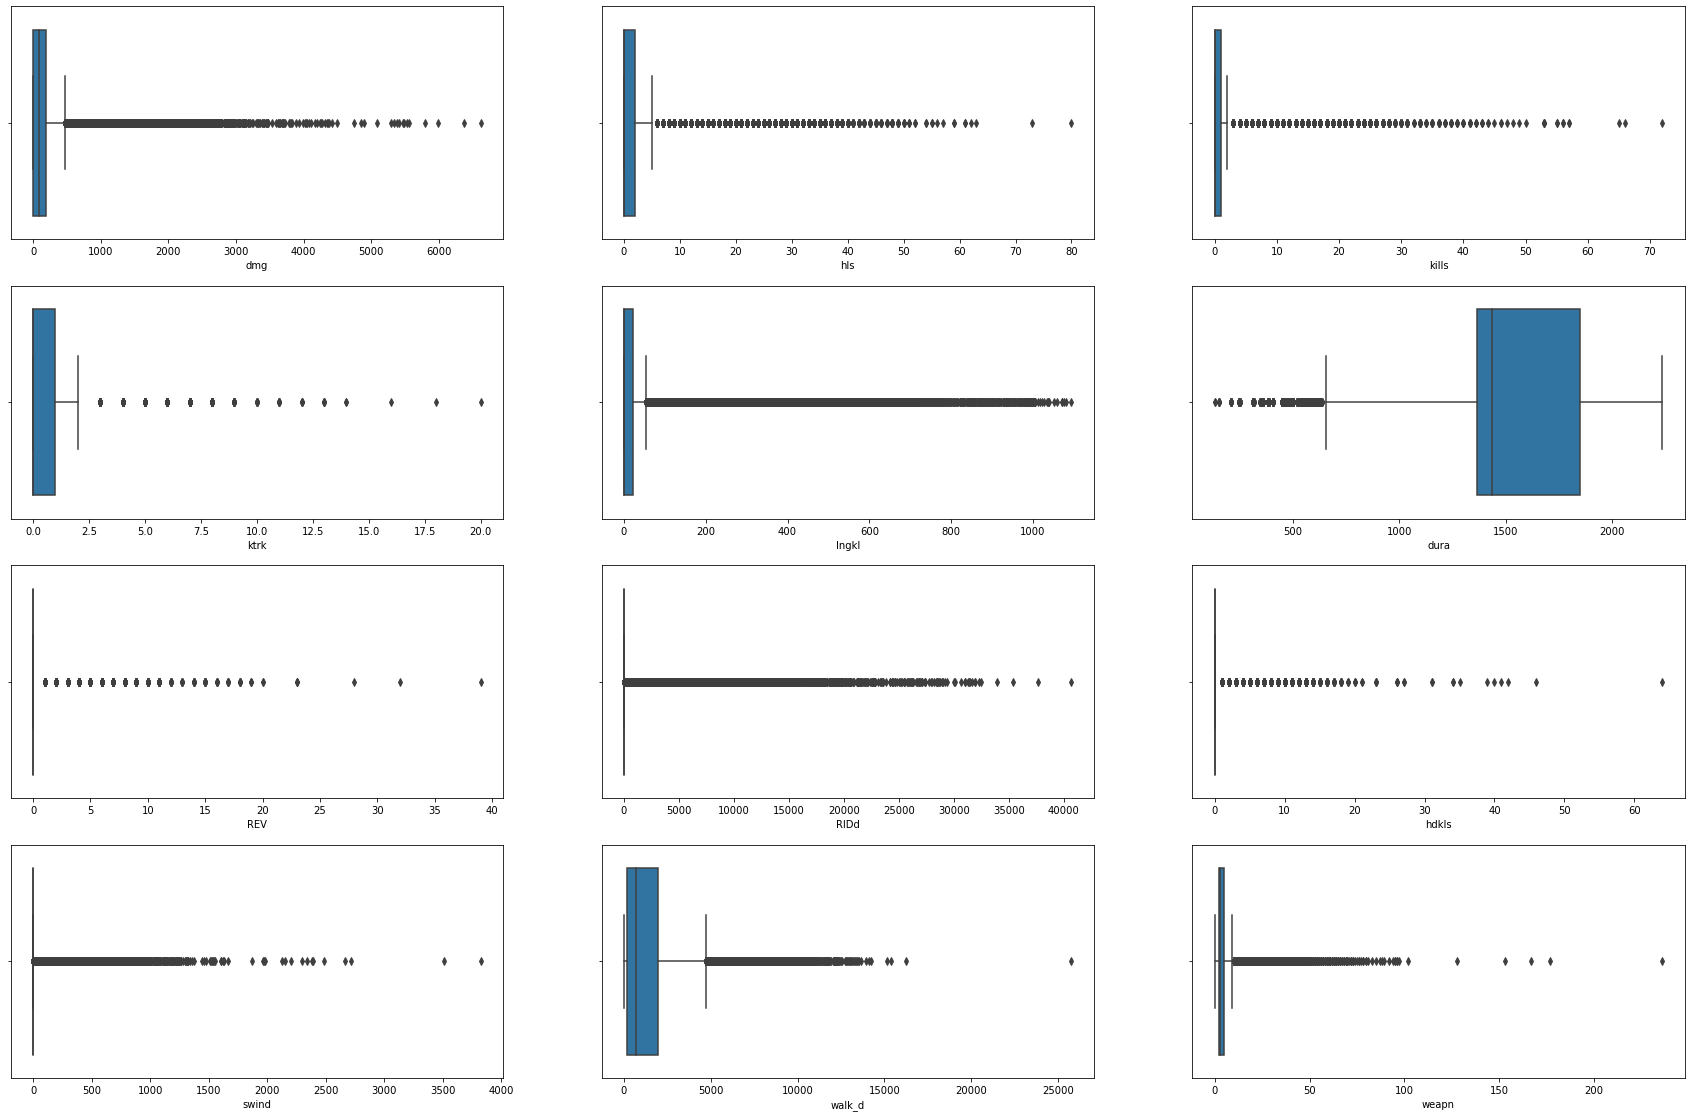

In [8]:
a=data[['dmg','hls','kills',
       'ktrk', 'lngkl', 'dura',
        'REV', 'RIDd','hdkls',
       'swind', 'walk_d',
       'weapn']]##continous columns
plt.figure(figsize=(30,30))
for i in range(len(a.columns)):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(a[a.columns[i]])#identify outliers with boxplot
plt.show()

* Most of columns have outliers that is more than 5%
* But there are hackers and cheaters,they use aim bots,wall hack,speed hack,esp hack,no recoil hack etc.will lead to abnormalities in our data.Data that include hackers is somehow meaningless and will have a negative effect on model building.But finding and removing total data of cheaters in our data is impossible..Lets search for cheaters,find players who have a doubtfull stat and remove it from our data

In [10]:
# we are doing a manual analysis and checking for cheaters
import pandas as pd
pd.set_option('display.max_rows', None)#to display max rows
pd.set_option('display.max_columns', None)#to display max columns
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
#lets check the players stats of players who killed more than 25 and walked distance less than 1500...because it is impossible
#may be this plaeyrs used aim bot
data[(data['kills'] >= 25) & (data['walk_d'] <=1500 )]

In [ ]:
#lets check the players stats of players who gives a damage more than 3000 and walked distance less than 1000...
#may be this plaeyrs used aim bot
data[(data["dmg"]>3000) & (data["walk_d"]<1000)]

In [ ]:
#lets check the players stats of players which headshots are more than 10 and walked distance less than 1000...
# Head shot cheat methods used players
data[(data["hdkls"]>10) & (data["walk_d"]<1000)]

In [ ]:
# the maximum kill distance is recorded is above 1000 meteres which is practically impossible(killed from one town 
# to another town)
data[(data["lngkl"]>900) & (data["walk_d"]<500)]

In [ ]:
#Aim bot cheats players usually land on rush areas and they kill enemies within seconds and these players
#loot normally very less boos and heals
data[(data["ktrk"]>10) & (data["hls"]<7) & (data["walk_d"]<3000)]

In [ ]:
#Players may use speed hack and try many guns
data[(data["weapn"]>40) & (data["walk_d"]<1500)]

In [ ]:
#cheats on road kills
data[(data["rdkls"]>10)]

In [ ]:
#some hackers use auto aim hacks and will finish the game within 5 minutes,ususally in solo matches
data[(data["walk_d"]<200) & (data["WinPerc"]==1)& (data["type"]=="solo")]

In [ ]:
#kills without guns are possibile(fist kills) but normally upto 3..If one player more than three cheating methods are there
data[(data["weapn"]==0) & (data["kills"]>3)]

In [9]:
#lets check the headshot rate,if the headshot rate is 99 above and kills are more than 10, they may use auto aim hacks
data["hdskRt"]=data["hdkls"]/data["kills"]*100
data.isnull().sum()
data.fillna(0,inplace=True)#null values are filled by zeros

In [ ]:
data[(data["hdskRt"]>99) & (data["kills"]>12)]


In [8]:
# lets check the kills streak percentage
data["ktrkR"]=data["ktrk"]/data["kills"]*100
data.isnull().sum()
data.fillna(0,inplace=True)

In [ ]:
# killstreaks are rare but wall hacks,speed hacks are there,it helps the players to kill enemies within short time
data[(data["ktrkR"]>90) & (data["kills"]>8) &(data["walk_d"]<1000)]

In [ ]:
#lets check players who took weapons without moving
data[(data["weapn"]>0) & (data["walk_d"]==0)]

In [ ]:
#Cheaters might knock players without any weapons
data[(data["weapn"]==0) & (data["DBNOs"]>2)]

In [ ]:
#damages without moving
data[(data["walk_d"]==0) & (data["dmg"]>0)]

In [10]:
#lets remove it from our data
col1 = data[ (data['kills'] >= 25) & (data['walk_d'] <=1500 )].index
data.drop(col1,inplace=True)
col2 = data[ (data['dmg'] >= 3000) & (data['walk_d'] <=1000 )].index
data.drop(col2,inplace=True)
col3=data[(data["hdkls"]>10) & (data["walk_d"]<1000)].index
data.drop(col3,inplace=True)
col4 = data[(data["ktrk"]>10) & (data["hls"]<7) & (data["walk_d"]<3000)].index
data.drop(col4,inplace=True)
col5=data[(data["lngkl"]>900) & (data["walk_d"]<500)].index
data.drop(col5,inplace=True)
col6=data[(data["weapn"]>40) & (data["walk_d"]<1500)].index
data.drop(col6,inplace=True)
col7=data[(data["rdkls"]>10)].index
data.drop(col7,inplace=True)
col8=data[(data["walk_d"]<200) & (data["WinPerc"]==1)& (data["type"]=="solo")].index
data.drop(col8,inplace=True)
col9=data[(data["hdskRt"]>99) & (data["kills"]>12)].index
data.drop(col9,inplace=True)
col10=data[(data["ktrkR"]>90) & (data["kills"]>8) &(data["walk_d"]<1000)].index
data.drop(col10,inplace=True)
col11=data[(data["weapn"]==0) & (data["kills"]>3)].index
data.drop(col11,inplace=True)
col12=data[(data["weapn"]>0) & (data["walk_d"]==0)].index
data.drop(col12,inplace=True)
col13=data[(data["walk_d"]==0) & (data["kills"]>0)].index
data.drop(col13,inplace=True)
col14=data[(data["walk_d"]==0) & (data["dmg"]>0)].index
data.drop(col14,inplace=True)


**Conversion of categorical columns in to numerical columns**

* Generally 4 types of matches are there
*  solo,duo,squad and others..
solo which includes one player,duo with two and squad with four(tpp and fpp are viewing methods)
* others are event modes which include crash and flare matches


In [11]:
#lets group the matchtype
def change(x):
    if x in ['squad-fpp','squad','normal-squad','normal-squad-fpp']:
        return 'squad'
    elif x in ['duo-fpp', 'duo','normal-duo-fpp', 'normal-duo']:
        return 'duo'
    elif x in ['solo-fpp', 'solo','normal-solo-fpp','normal-solo']:
        return 'solo'
    else:
        return 'others'

In [12]:
data['type']=data['type'].map(change).to_frame()#using map 
data.dropna(inplace=True)

In [13]:
#lets use label enocde for match type
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
data["type"]=la.fit_transform(data["type"])

**Feature addition**


* Headshot Rate

In [14]:
#we have headshot kills and we already created the percentage of headshots with respect to kills
data["hdskRt"].head(2)

0    0.0
1    0.0
Name: hdskRt, dtype: float64

* Heals and Boost

In [15]:
#The impact of heals and boost in a game is high but the nature of both items is same,so we decided to combine this two
data["hls&bst"]=data["bst"] + data["hls"]

* Assist and Revive

In [16]:
# Assist and revives are teamsupport and coordination among the team players,the nature of these two columns are also same
data["astnhls"]=data["ast"]+data["REV"]

* Players joined


How many players are joined in a match ,this will be an important feature because matches with less players are easy to win sometimes

In [17]:
data['playersJoined'] = data.groupby('mhid')['mhid'].transform('count')

**Feature Removal**

* Id and Group id's are unwanted so lets remove it from data
* Killstreak rate are created for outlier detection
* 4 merged columns are there (heals,boosts,revives and assist)
* longestkills,road kills,vehicle destroyed columns are not contributing towards the target column ..vehicle destroyed has a column has a good correlation with winning percentage but this column is actually meaningless..
* Players joined column generated from match id ,so lets remove match id too
* headshot rates are created using headshot kill columns,lets remove this too

In [18]:
#deleting unwanted columns
data.drop(["Id","gpid","mhid","hdkls","bst","hls","ast","REV","vehcl_destr","ktrkR","rdkls","lngkl"],axis=1,inplace=True)

In [19]:
data=reduce_mem_usage(data)#to reduce our data size

In [20]:
#lets check for duplicate rows
data.duplicated().sum()
#no duplicate rows

223

In [21]:
#delete duplicated rows
data = data.drop_duplicates()

### Cheking for correlation

<AxesSubplot:>

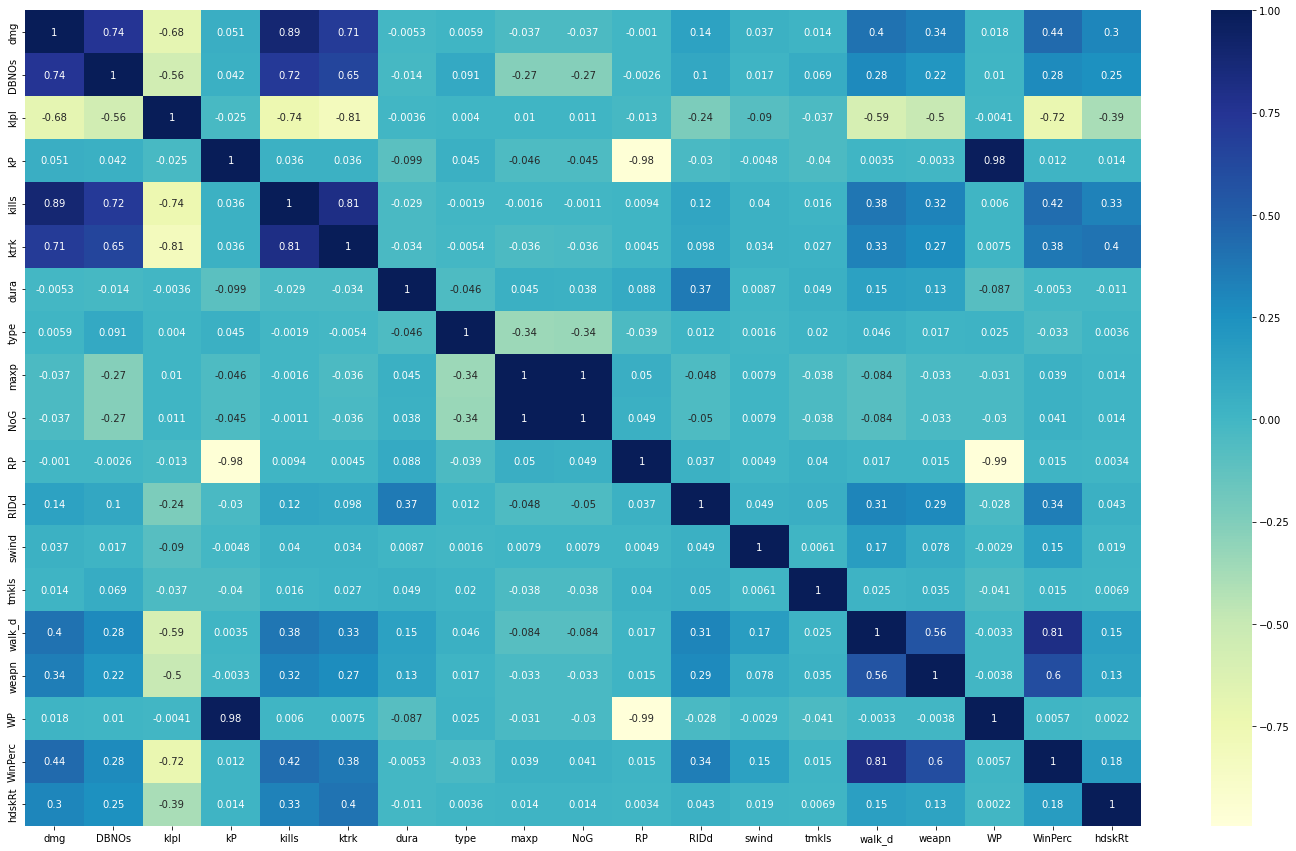

In [60]:
plt.figure(figsize=(25,15))
sns.heatmap(data=data.corr(), cmap="YlGnBu", annot=True)

* Number of groups and maxiplace are highly correlated with each other
* Kill points and winpoints are also highly correlated

In [22]:
#lets remove Maxplace and kill points
data.drop(["maxp","kP"],axis=1,inplace=True)

In [22]:
#Already checked for the constant columns and there is no constant column in our data

In [28]:
data.columns

Index(['dmg', 'DBNOs', 'klpl', 'kills', 'ktrk', 'dura', 'type', 'NoG', 'RP',
       'RIDd', 'swind', 'tmkls', 'walk_d', 'weapn', 'WP', 'WinPerc', 'hdskRt',
       'hls&bst', 'astnhls', 'playersJoined'],
      dtype='object')

## Model Building

- split data into train & test part
- we will take 25% of the data for testing

In [23]:
x=data.loc[:, data.columns != 'WinPerc']
y=data['WinPerc']

**Data Balancing**(Standard Scaler)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)

In [25]:
df=pd.DataFrame(data=scaled_data, columns= x.columns)

In [26]:
#lets do pca for dimension reduction(Principal component analysis (PCA) is a technique to bring 
#out strong patterns in a dataset by supressing variations)
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)

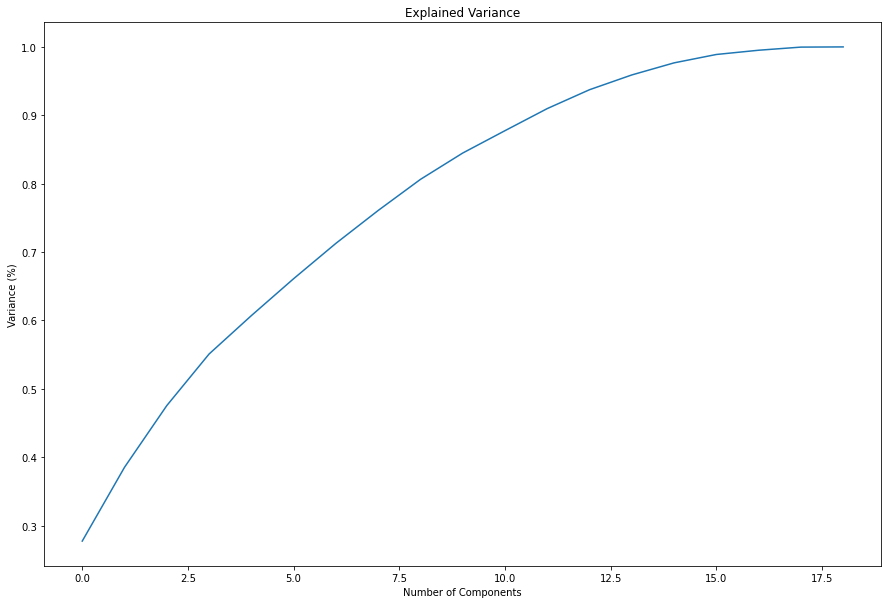

In [27]:
plt.figure(figsize=(15,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

* From the daigram above,it can be seen that 17 principal components explain 100% variance of the data

In [28]:
pca = PCA(n_components=17)
new_data = pca.fit_transform(df)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(principal_Df,y,test_size=0.25,random_state=50)#spliting the data

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3319061, 17)
(1106354, 17)
(3319061,)
(1106354,)


In [32]:
model_name = []
mse1 = []
mae1 = []
rmse1=[]
r21=[]
adjusted_r21=[]

def model_run(model):
  model.fit(x_train,y_train)  # fit data into model
  y_pred = model.predict(x_test) # prediction on test data
  mse = mean_squared_error(y_test,y_pred)  # Train score
  mae =  mean_absolute_error(y_test,y_pred) # Test score
  rmse= math.sqrt(mean_squared_error(y_test, y_pred))
  r2score=r2_score(y_test,y_pred)
    
  # for building data frame we store model data
  model_name.append(model)
  mse1.append(mse)
  mae1.append(mae)
  rmse1.append(rmse)
  r21.append(r2score)
  # print details
  print(model)
  print("mse",mse)
  print("mae ",mae)
  print("rmse ",rmse)
  print("r2",r2score)
  print("=====================================")


In [33]:
rdf  = RandomForestRegressor(n_jobs=-1)
SGD = SGDRegressor()
lr  = LinearRegression(n_jobs=-1)
lgbm = LGBMRegressor(n_jobs=-1)
LS   = Lasso(alpha=.6)
rd = Ridge()
d_tree=DecisionTreeRegressor()
gd=GradientBoostingRegressor()
xgb = XGBRegressor(n_jobs=-1)


# model List
models = [rd,SGD,lr,lgbm,d_tree,LS,xgb,gd,rdf]


In [34]:
# try with every model 
for i in models:
  model_run(i)

Ridge()
mse 0.015309976
mae  0.09070331
rmse  0.12373348945958816
r2 0.8371444841788522
SGDRegressor()
mse 0.01534543025031174
mae  0.09071258948837325
rmse  0.12387667355201196
r2 0.8367673561005032
LinearRegression(n_jobs=-1)
mse 0.015309976
mae  0.090705
rmse  0.12373348945958816
r2 0.8371444783897182
LGBMRegressor()
mse 0.008917049716741244
mae  0.06819398263450593
rmse  0.09443013140275325
r2 0.9051474232195371
DecisionTreeRegressor()
mse 0.01633674941623482
mae  0.08940035527394993
rmse  0.12781529414054807
r2 0.8262224808013189
Lasso(alpha=0.6)
mse 0.09400956
mae  0.26712897
rmse  0.3066097900048784
r2 -2.4913804574921983e-08
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             lea

In [35]:
model_report1 = pd.DataFrame([model_name,r21,mse1,rmse1,mae1]).T
model_report1.columns = ["Model","R2","mse","rmse","mae"]
model_report1.sort_values("R2",ascending=False).reset_index(drop=True)

Model        R2       mse  \
0  (DecisionTreeRegressor(max_features=1.0, rando...   0.91825  0.007685   
1  XGBRegressor(base_score=0.5, booster='gbtree',...  0.914155   0.00807   
2                                    LGBMRegressor()  0.905147  0.008917   
3  ([DecisionTreeRegressor(criterion='friedman_ms...  0.872424  0.011993   
4                                            Ridge()  0.837144   0.01531   
5                        LinearRegression(n_jobs=-1)  0.837144   0.01531   
6                                     SGDRegressor()  0.836767  0.015345   
7                            DecisionTreeRegressor()  0.826222  0.016337   
8                                   Lasso(alpha=0.6)      -0.0   0.09401   

       rmse       mae  
0  0.087666  0.062395  
1  0.089834  0.064901  
2   0.09443  0.068194  
3  0.109514  0.080381  
4  0.123733  0.090703  
5  0.123733  0.090705  
6  0.123877  0.090713  
7  0.127815    0.0894  
8   0.30661  0.267129

In [32]:
x_test.shape

(1106354, 17)

In [35]:
#Lets find adjusted r2 of top 3 models
## adjusted r2 score of Random Forest
adjusted_r2_1 = 1-(1-0.91)*(1106354-17)/(1106354-17-1)
adjusted_r2_2 = 1-(1-0.91)*(1106354-17)/(1106354-17-1)
adjusted_r2_3 = 1-(1-0.90)*(1106354-17)/(1106354-17-1)
print(adjusted_r2_1)
print(adjusted_r2_2)
print(adjusted_r2_3)

0.909999918650392
0.909999918650392
0.8999999096115466


### Model Improvement

**Tuning XGB parameters using Randomized searchCV**

In [32]:
#parameter list
params={"n_estimators" : [50,100,200,500],
        "max_depth" :[2,4],
        "min_child_weight" :[1,2],
       "booster":["gblinear","gbtree"],
       "learning_rate":[0.1,0.3]}

In [33]:
regressor=xgboost.XGBRegressor()

In [40]:
#paramter tuning using Randomized search cv
from sklearn.model_selection import RandomizedSearchCV
random_cv=RandomizedSearchCV(estimator=regressor,
                             param_distributions=params,
                            cv=2,verbose=2,
                             scoring="r2",n_jobs=-1)

In [41]:
random_cv.fit(x_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=-1,
                   param_distributions={'booster': ['gblinear', 'gbtree'],
                                        'learning_rate': [0.1, 0.3],
                                        'max_depth': [2, 4],
                                        'min_child_weight': [1, 2],
                                        'n_estimators': [50, 100, 200]},
                   scoring='r2', verbose=2)

In [46]:
random_cv.best_params_#best paramteter we got

{'n_estimators': 50,
 'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.3,
 'booster': 'gbtree'}

In [48]:
xgb1=XGBRegressor(n_estimators=50,min_child_weight= 1,max_depth=4,learning_rate= 0.3,booster='gbtree')
model2=xgb1.fit(x_train, y_train)

In [49]:
y_pred2=model2.predict(x_test)
import math
r2score=r2_score(y_test,y_pred2)#R2 score
print(r2score)
print(mean_squared_error(y_test,y_pred2))#mean squared error
print(math.sqrt(mean_squared_error(y_test,y_pred2))) # root mean squared error
print(mean_absolute_error(y_test,y_pred2))#mean absolute error

0.8916906351334377
0.010182115
0.10090646782707126
0.0734307


* Our r2 score reduced to 89%,mse and rmse score also increased

**Tuning RandomForest Regressor with Halving Searchcv**

In [33]:
grid={"n_estimators" : [50,100,200,500],
        "min_samples_split" : [2,4,8,16],
        "min_samples_leaf":[2,4,6,10],
         "max_leaf_nodes" :[2,4,6]}

In [38]:
#we alread tried with grid search cv and randomized searcv ,it took a good memmory space and time..we found 
# halving randmised search will give good result
from sklearn.ensemble import RandomForestRegressor
RCV=RandomForestRegressor()
from sklearn.experimental import enable_halving_search_cv #
from sklearn.model_selection import HalvingRandomSearchCV
random_cv1=HalvingRandomSearchCV(estimator=RCV,
                             param_distributions=grid,
                            cv=2,verbose=2,
                             scoring="r2",n_jobs=-1)

In [ ]:
random_cv1.fit(x_train,y_train)

In [ ]:
random_cv1.best_params_#search for the best params

In [48]:
rcv=RandomForestRegressor(n_estimators=500,min_samples_split=8,min_samples_leaf=10,max_leaf_nodes=6,n_jobs=-1)
m1=rcv.fit(x_train,y_train)#fitting the model with best params


In [49]:
y_pred3=m1.predict(x_test)
import math
r2score=r2_score(y_test,y_pred3)
print(r2score)
print(mean_squared_error(y_test,y_pred3))#mean squared error
print(math.sqrt(mean_squared_error(y_test,y_pred3))) # root mean squared error
print(mean_absolute_error(y_test,y_pred3))#mean absolute error
#the result was poor and parameters tuning using halving randomised search cv was a failure

0.6381810852562146
0.03401443967827176
0.1844300400647133
0.1442122005543107


**model improvement of LGBMRegressor with custom parameter tuning**

In [31]:
import lightgbm as lgbm
lgbm = LGBMRegressor(objective='mse', n_estimators=8000,  
                     learning_rate=0.1, num_leaves=600,
                     max_depth=15,bagging_fraction= 0.8, bagging_freq= 5, feature_fraction= 0.7,
                     n_jobs=-1, random_state=50, verbose=50)

lgb_reg = lgbm.fit(x_train, y_train, eval_set=[(x_test, y_test)], eval_metric='mse', early_stopping_rounds=100, verbose=50)  

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000000
[LightGBM] [Debug] init for col-wise cost 0.000309 seconds, init for row-wise cost 0.136766 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.177656 seconds.
You can set `force

[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Re-bagging, using 2656003 data to train
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Re-bagging, using 2656235 data to train
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Re-bagging, using 2656415 data to train
[LightGBM] [Debug] 

[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Re-bagging, using 2655218 data to train
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Re-bagging, using 2653295 data to train
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] 

[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Re-bagging, using 2655295 data to train
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[300]	valid_0's l2: 0.00682729
[LightGBM] [Debug] Re-bagging, using 2654990 data to train
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves =

[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Re-bagging, using 2654165 data to train
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[400]	valid_0's l2: 0.00678089
[LightGBM] [Debug] Re-bagging, using 2655424 data to train
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Re-bagging, using 2655048 data to train
[LightGBM] [Debug] Trained a tree with leaves = 600 and

[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[500]	valid_0's l2: 0.00675913
[LightGBM] [Debug] Re-bagging, using 2654253 data to train
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Re-bagging, using 2656051 data to train
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves =

[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Re-bagging, using 2654738 data to train
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Re-bagging, using 2655749 data to train
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] 

[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Re-bagging, using 2656230 data to train
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Re-bagging, using 2655470 data to train
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] 

[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Re-bagging, using 2654630 data to train
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Re-bagging, using 2655637 data to train
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 600 and depth = 15
[LightGBM] 

In [32]:
y89=lgb_reg.predict(x_test)

In [33]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
r2score=r2_score(y_test,y89)
print(r2score)
print(mean_squared_error(y_test,y89))#mean squared error
print(math.sqrt(mean_squared_error(y_test,y89))) # root mean squared error
print(mean_absolute_error(y_test,y89))#mean absolute error error

0.9282939089870017
0.006741058601243817
0.08210394997345631
0.0587341040220775


* The r2 score is improved from 90% to 92% after the the custom tuning of the parameters and mse and rmse score reduced considerably

In [49]:
x_test.shape

(1106354, 17)

In [50]:
#lets check the adjusted r2 score
adjusted_r2_1 = 1-(1-0.92)*(1106354-17)/(1106354-17-1)
adjusted_r2_1

0.9199999276892373

* The adjusted r2 is 91% which is good

## Model comparison Report

**Model Report**

In [67]:

ER=model_report1.sort_values("R2",ascending=False).reset_index(drop=True)
ER["r2_aftr_tuning"]=[0.63,0.89,0.92,0,0,0,0,0,0]
ER["mse_aftr_tuning"]=[0.034,0.0101,0.006,0,0,0,0,0,0]
ER["rmse_aftr_tuning"]=[0.184,0.100,0.082,0,0,0,0,0,0]
ER["mae_aftr_tuning"]=[0.144,0.0734,0.058,0,0.0,0,0,0,0]

Model        R2       mse  \
0  (DecisionTreeRegressor(max_features=1.0, rando...   0.91825  0.007685   
1  XGBRegressor(base_score=0.5, booster='gbtree',...  0.914155   0.00807   
2                                    LGBMRegressor()  0.905147  0.008917   
3  ([DecisionTreeRegressor(criterion='friedman_ms...  0.872424  0.011993   
4                                            Ridge()  0.837144   0.01531   
5                        LinearRegression(n_jobs=-1)  0.837144   0.01531   
6                                     SGDRegressor()  0.836767  0.015345   
7                            DecisionTreeRegressor()  0.826222  0.016337   
8                                   Lasso(alpha=0.6)      -0.0   0.09401   

       rmse       mae  r2_aftr_tuning  mse_aftr_tuning  rmse_aftr_tuning  \
0  0.087666  0.062395            0.63           0.0340             0.184   
1  0.089834  0.064901            0.89           0.0101             0.100   
2   0.09443  0.068194            0.92           0.0060             0.082   
3  0.109514  0.080381            0.00           0.0000             0.000   
4  0.123733  0.090703            0.00           0.0000             0.000   
5  0.123733  0.090705            0.00           0.0000             0.000   
6  0.123877  0.090713            0.00           0.0000             0.000   
7  0.127815    0.0894            0.00           0.0000             0.000   
8   0.30661  0.267129            0.00           0.0000             0.000   

   mae_aftr_tuning  
0           0.1440  
1           0.0734  
2           0.0580  
3           0.0000  
4           0.4200  
5           0.0000  
6           0.0000  
7           0.0000  
8           0.0000

**R2 score of Models(default paramters)**

R2 score of Models(default paramters)


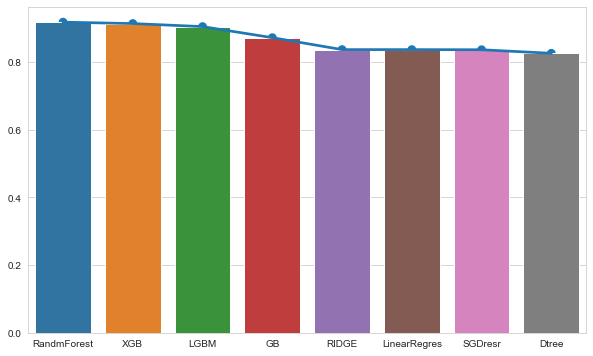

In [53]:
print("R2 score of Models(default paramters)")
et=[0.91825,0.914155,0.905147,0.872424,0.837144,0.837144,0.836767,0.826222]
ef=["RandmForest","XGB","LGBM","GB","RIDGE","LinearRegres","SGDresr","Dtree"]
plt.figure(figsize=(10,6))
sns.pointplot(ef,et)
sns.barplot(ef,et)
plt.show()

* We did PCA for dimensionality reduction and found 17 principal components are explains 100% variance of the data
* Based on the performance of models with default parameters, we selected  top 3 machine learning models for further parameter tuning
* The Randomforest regressor,XGB Regressor and LGBM Regressor algorithms gives an R2 score which is greater than 90..Adjusted R2 score is also close to 90.
* After tuning the parameters LGBM Regressor give an R2 of 92.8% and adjusted R2 of 91.9%, means the model fits the data well..Mean squared error and Root mean sqaured error is also small..Rest of the algorithms not performed up to the mark..
* However the data contains many errors that leads to the high variance 
* We found that creating new features that better represent players metrics and improved overall prediction scores(players joined,HeadshotshotRate etc)
* we had domain knowledge regarding this topic and it helps to finding interesting trends,analyse and address relevent features that represent our data

**Performance of Top 3 Models**

R2 score of Models after parameter tuning


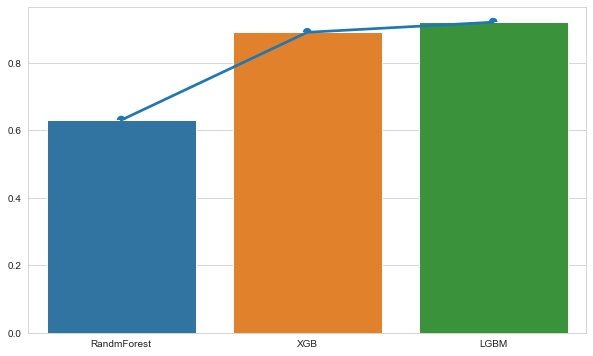

In [63]:
print("R2 score of Models after parameter tuning")

ef=["RandmForest","XGB","LGBM"]
plt.figure(figsize=(10,6))
sns.pointplot(ef,et)
sns.barplot(ef,et)
plt.show()


* Model Creation using linear regression,GB regressor,and Decision tree regressor didnot come as expected(Gives an R2 which is less than 90 ).
* **XGB Regression** : XGB regressor gives good result with default parameters.We got an R2 of 91 and Adjusted R2 90,but after parameter tuning R2 score was reduced to 87..
* **Random Forest Regression** :  We expected that random forest would work better as the model would not be on an assumption that the winPlacePerc is a linear combination of the inputs. At the cost of more time taken for fit(2 hours), random forest is able to discover more complex dependencies.We got good R2(91.5) and less MSE(0.087) .But after tuning the model overfits, where  R2 reduced to 63 and RMSE increased to 0.184. The scores was unsatisfactory, So we decide to try LGBM(Light Gradient Boosting ) because these boosting tree models work quite well with numerical and continuous variables which is entirely what our dataset is.

* **LGBM** : We found that this gradient boosting model worked best and it gives an **R2 which is nearer to 93 and Adjusted R2 of 92**. LGBM is a whole model of decision trees which learns by fitting negative gradients which are called residual errors. LGBM has over 100 parameters but we have used only few which we found it necessary to prevent the model from overfit..Only small amount of time taken for its run when compared to Random Forest and also produced good result too..

**Error Analysis**

* **Mean Square Error(MSE),Root Mean Squared Error (RMSE)and Mean Absolute Error (MAE)** are metrics used to evaluate a Regression Model. These metrics tell us how accurate our predictions are and, what is the amount of deviation from the actual values.
* Mean Square Error gives can help you understand how much your predicted results deviate from the actual number.
* Root Mean Square Error(RMSE) is the square root of MSE. It is interpreted as how far on an average, the residuals are from zero
* Mean Absolute Error (MAE) is the sum of absolute error
This loss function provides an appropriate measure of our model prediction accuracy
* Our data contains may errors and also abnormalities are there.But in our data analysis, we managed to identify outliers 
and abnormalities that are present in our data and also treated the same at a certain percentage.
Lets analyse the erros

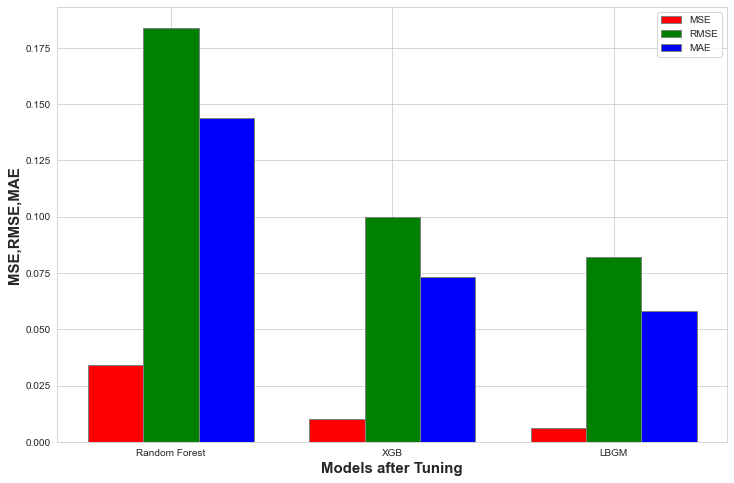

In [62]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
MSE = [0.034, .010, 0.006]
RMSE = [0.184,0.100,0.082]
MAE = [0.144,0.073,0.058]
 
# Set position of bar on X axis
br1 = np.arange(len(MSE))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, MSE, color ='r', width = barWidth,
        edgecolor ='grey', label ='MSE')
plt.bar(br2, RMSE, color ='g', width = barWidth,
        edgecolor ='grey', label ='RMSE')
plt.bar(br3, MAE, color ='b', width = barWidth,
        edgecolor ='grey', label ='MAE')
 
# Adding Xticks
plt.xlabel('Models after Tuning', fontweight ='bold', fontsize = 15)
plt.ylabel('MSE,RMSE,MAE', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(MSE))],
        ['Random Forest', 'XGB', 'LBGM'])
 
plt.legend()
plt.show()

* Due to overfitting of Random forest model,percentage of error is increased after tuning.XGB regressor also not performed well
* After paramter tuning we got the best results with **LGBM Regressor**..we got an RMSE of 0.082 and MAE of 0.058 which is good..

* **We are concluding that the  LGBM Regressor model(after tuning) provides a good adjusted R2 score with a minimal error rate**

### CHALLENGES FACED DURING THE PROJECT

* The main and most challenge we faced was data size,Throughout the project this was a main concern..And we use data size
reduction technique by reduced our data size from 983MB to 383MB without any information loss ..This results reduced memory space,helps
fast process and save time too...
* After EDA, notebook size was increased around 40MB and it was difficult to open the file.This was resolved by
dividing the notebook into three parts(EDA,Data Preprocessing and Model Building) and later combine it in a single page..
* Another difficulty was addressing relevent features, a deep searching and analysis of features are done for that
* Number of features is high in this dataset,we performed PCA for dimensionality reduction
* There was lot of syntax errors throughout the project and most them were solved through by referring 
study notes again and some of them through stack overflow website,geeksforgeeks website
* Lot of time taken for Data Analysis because there are many features and data size was high too..Choosing the right and
meaningfull graphs for representing the data is sometimes difficult..
* Lot of time taken for Handling outlayers and finding errors,we did a manual analysis of data cleaning
* During data preprocessing confusions regarding Handling the outliers and also about data errors.We reffered towards data science,
wesite and medium website
* Parameter tuning was a task,first we tried with grid search cv and randomised search cv,but it took more than 8 hours to get the results..
We checked any alternative techniques to replace this or reduce the running time and found some methods that is HalvingGridsearch cv and  HalvingRandomized search cv ..
* At first, model creation was done seperatly but it takes lot of time and length of notebook was increased.This problem was solved by creating models using for loop..it saved time and reduce length of notebook..

